In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import numpy as np

In [3]:
lnx = pd.read_json('linux_contributors.json')

In [33]:
def fun(t,a):
    xp = np.exp(a[1]*t/52)
    return a[0]*(xp - 1)/a[1]/xp


def lsq(x_observed, a):
    t = np.arange(len(x_observed))
    x_model = fun(t,a)
    err = x_model - x_observed 
    return np.dot(err, err) / len(err)


def model_fit(x):   
    x = np.array(x, dtype=np.float64) / max(x)
    res = minimize(lambda a: lsq(x,a), (1/len(x), 0.1), method='SLSQP', bounds=((0, None), (0, None)))
    fit_params = res.x
    mx = fun(np.arange(len(x)), fit_params)
    pd.Series(mx).plot(title="$\mu$ = {:3.2f}".format(fit_params[1] / fit_params[0]))
    nx = pd.Series(x)
    nx.plot()
    plt.show()
    return res


In [40]:
def main(lnx):
    rm = {}
    for entry in lnx.iloc:
        rm = dict()
        for i in entry.weeks:
            d = dict(i)
            w = d['w']
            if w in rm:
                rm[w]+=d['a'] + d['d']
            else:
                rm[w]=d['a'] + d['d']
        sorted_rm_items = sorted(rm.items())
        t = pd.Series([y for x, y in sorted_rm_items]).cumsum()
        t = t[t != 0]  # Remove zeros
        model_fit(t)   

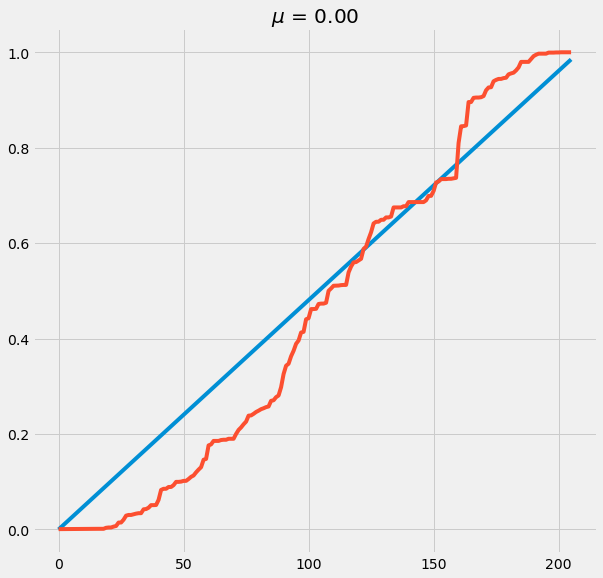

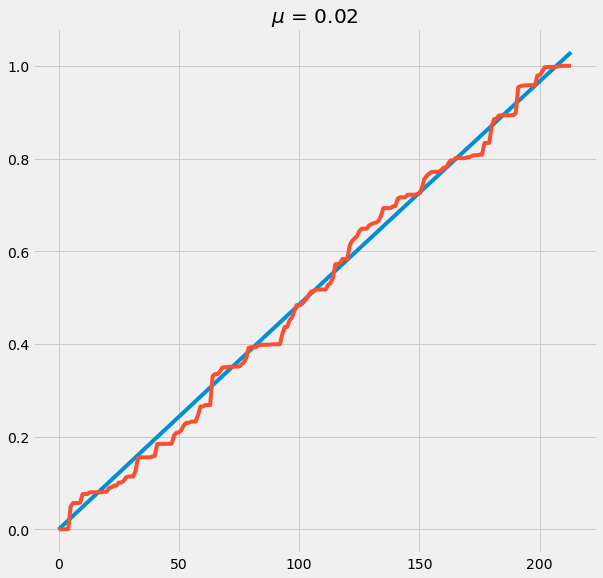

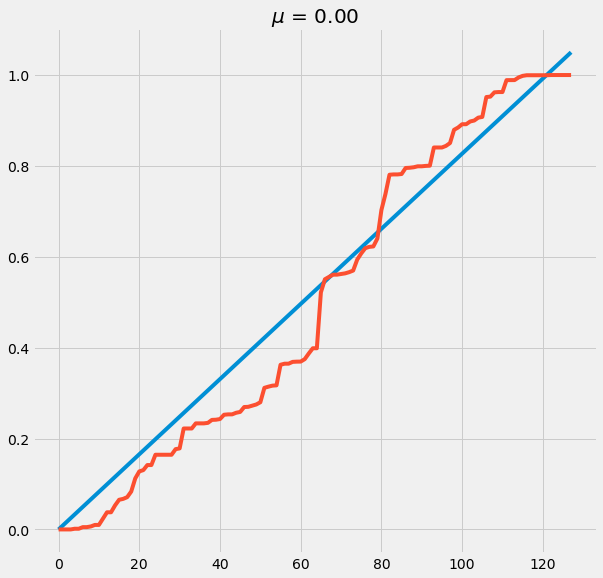

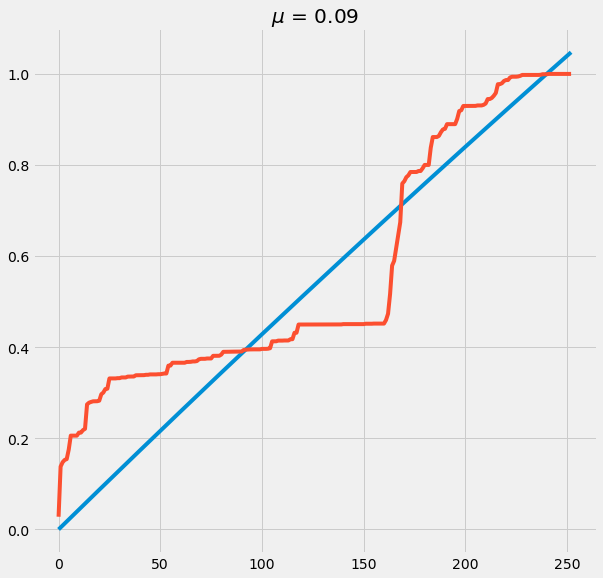

C:\Users\ya-dm\miniconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
C:\Users\ya-dm\miniconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


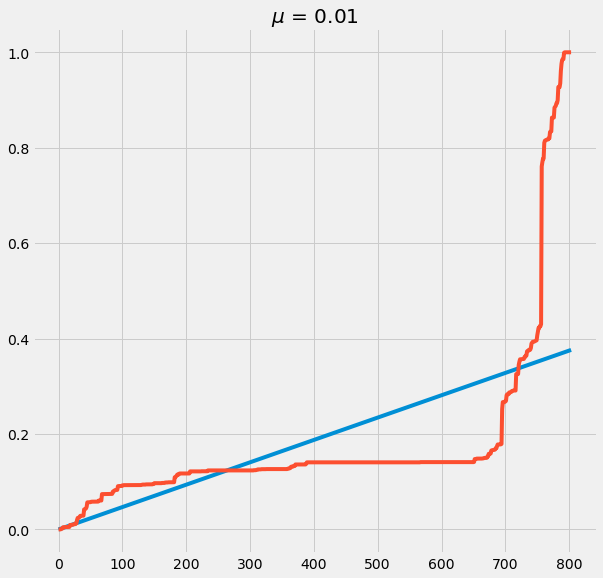

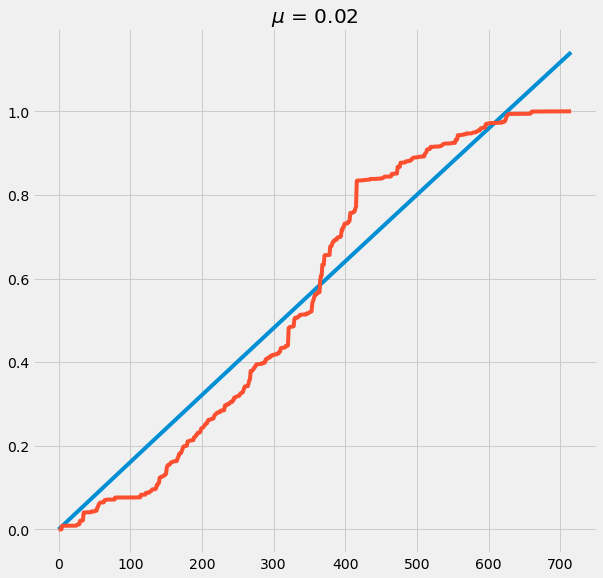

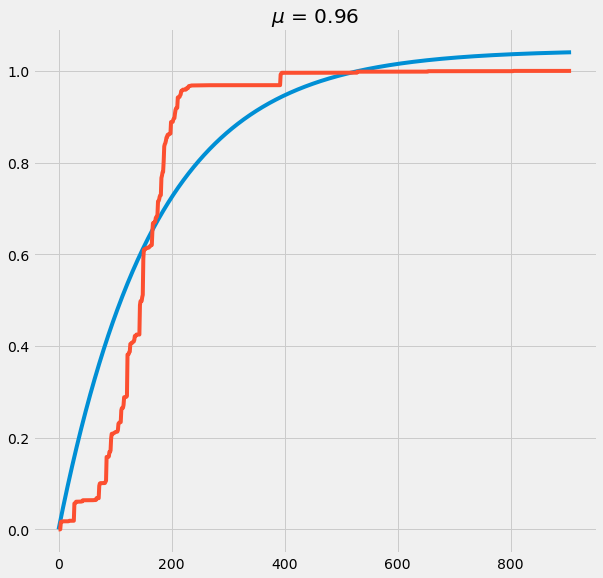

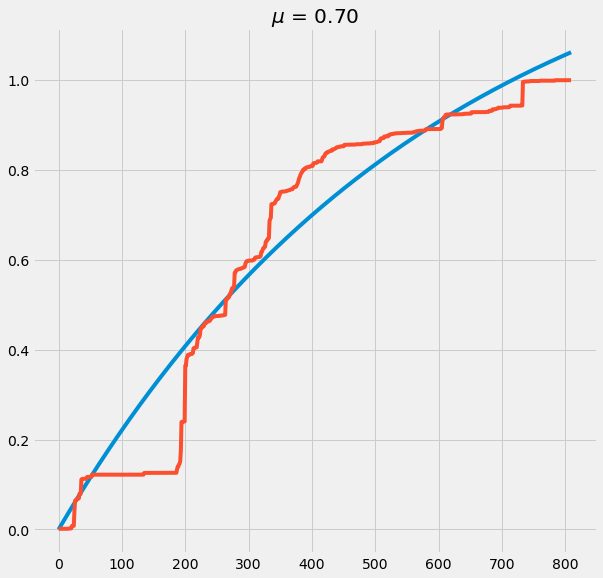

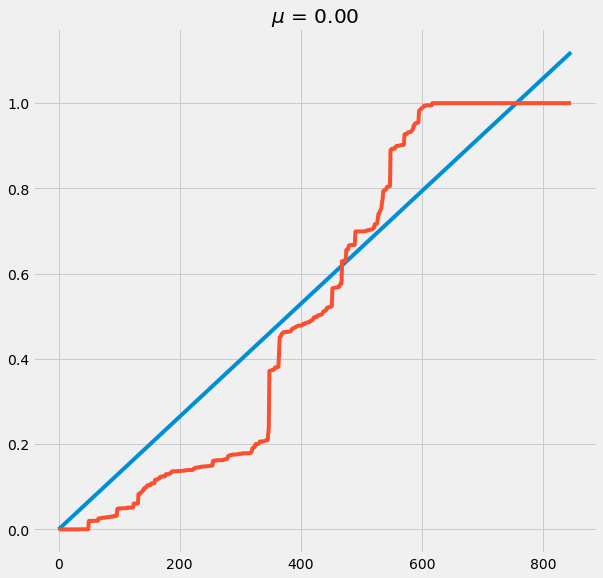

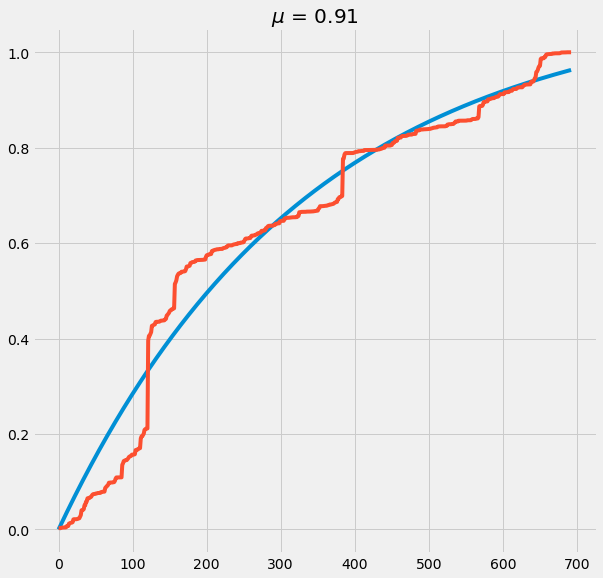

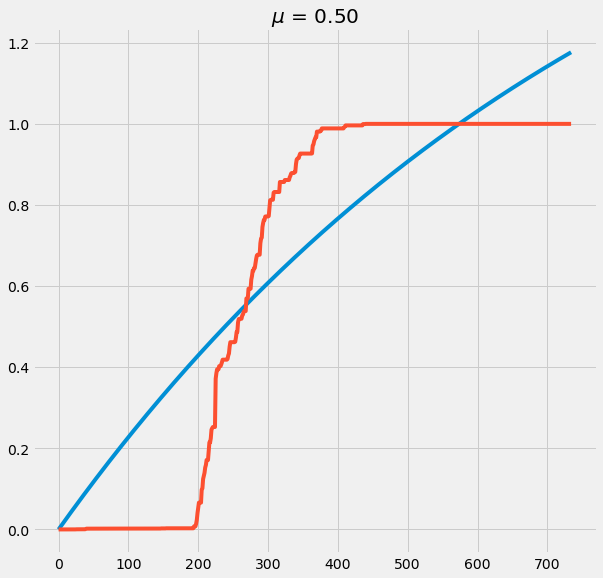

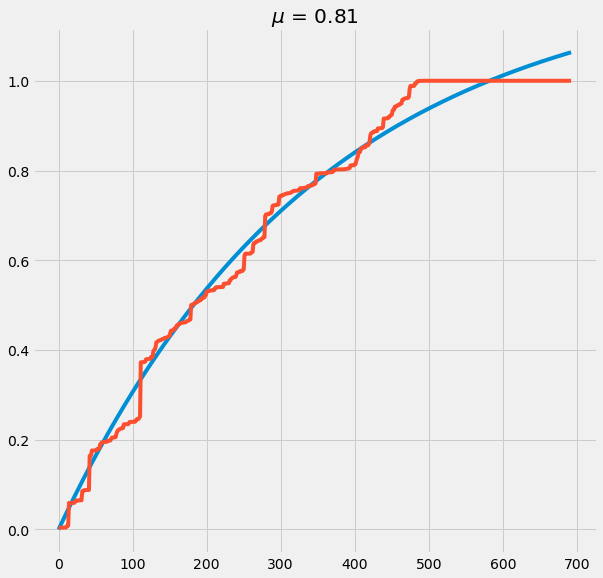

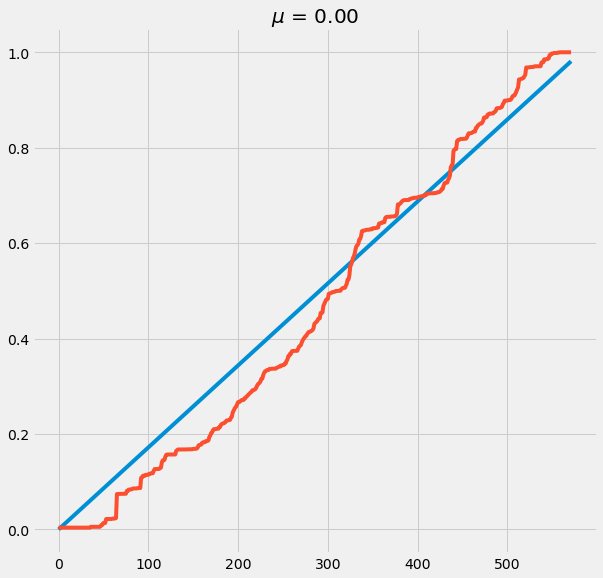

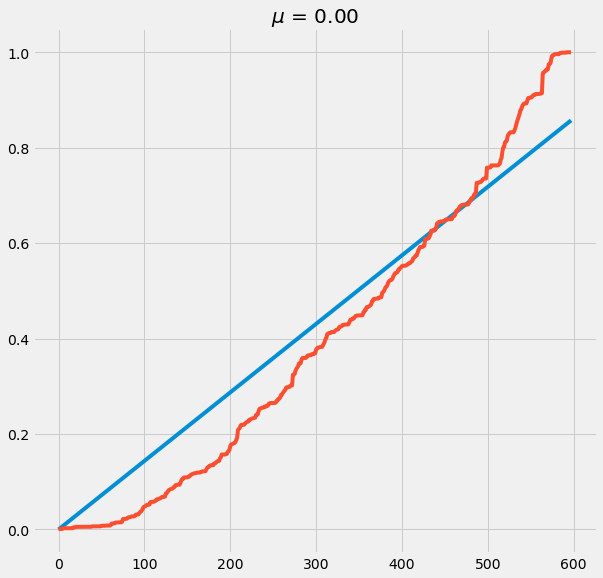

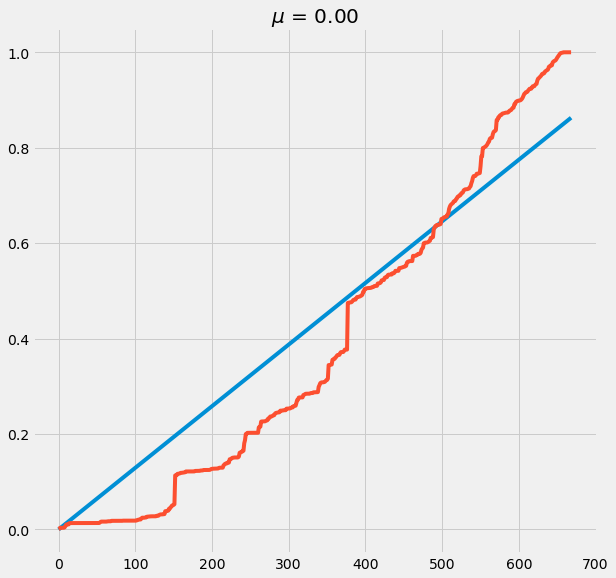

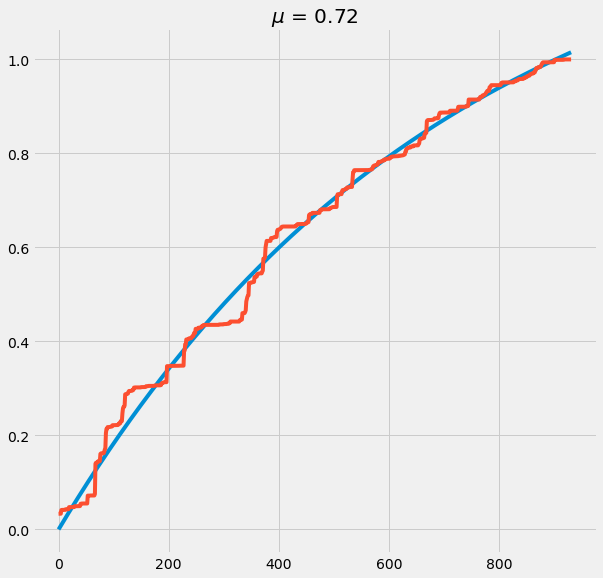

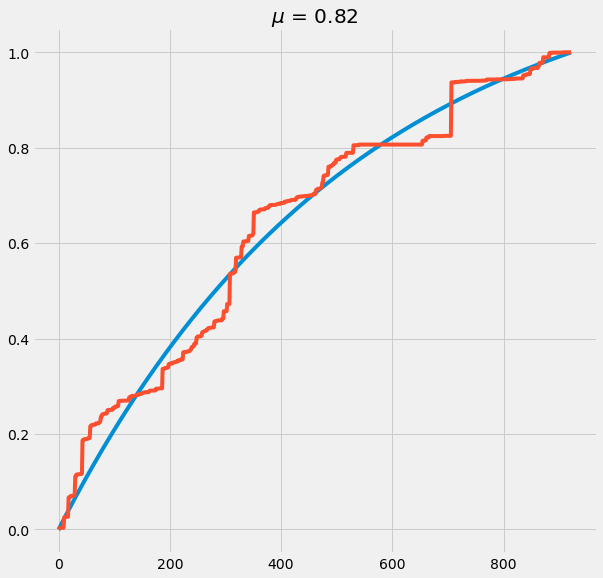

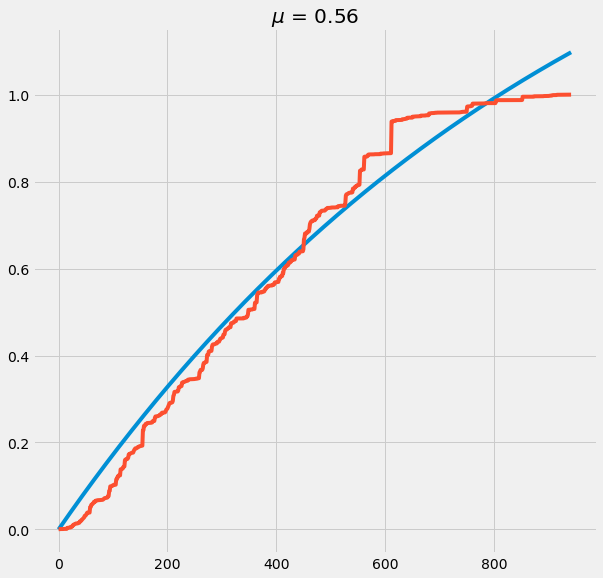

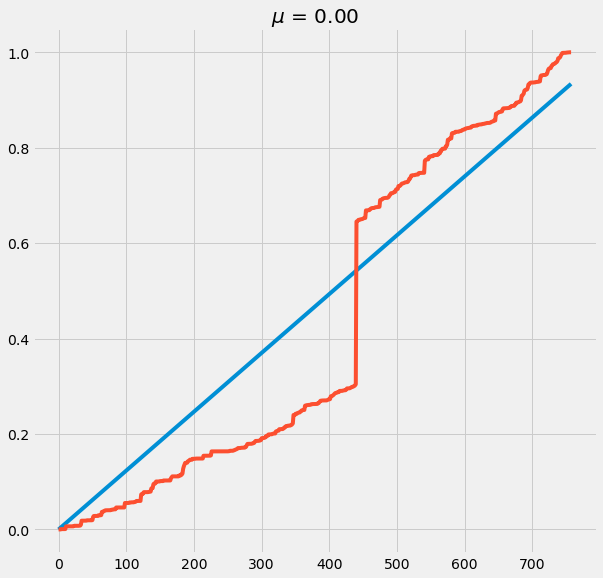

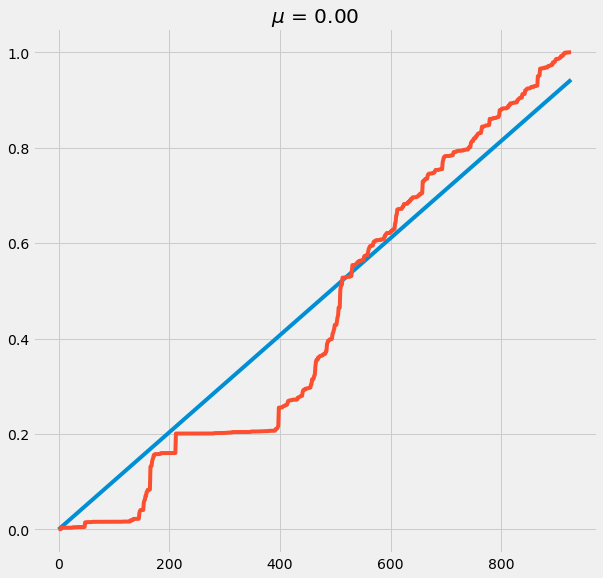

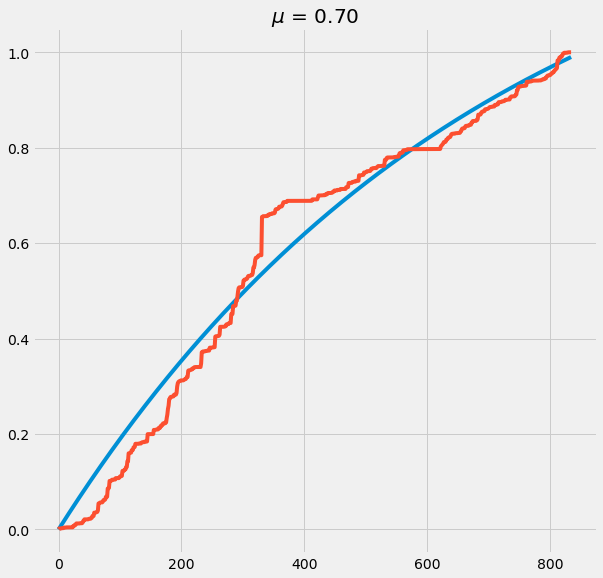

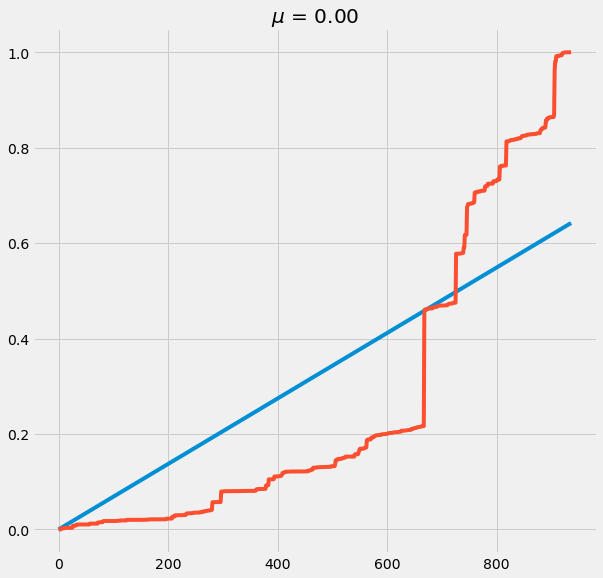

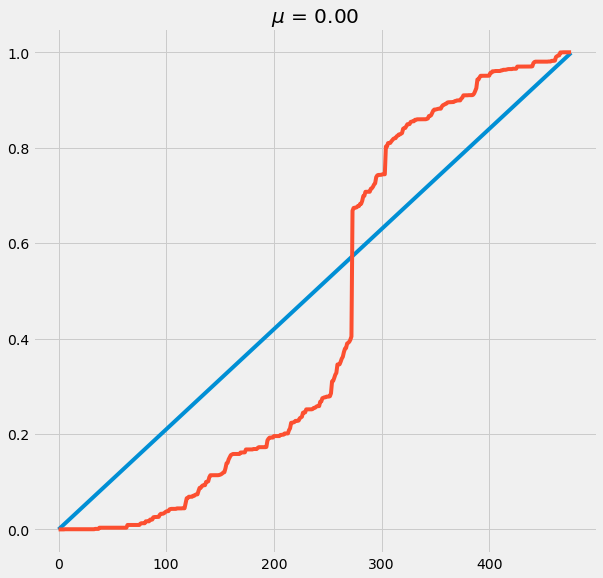

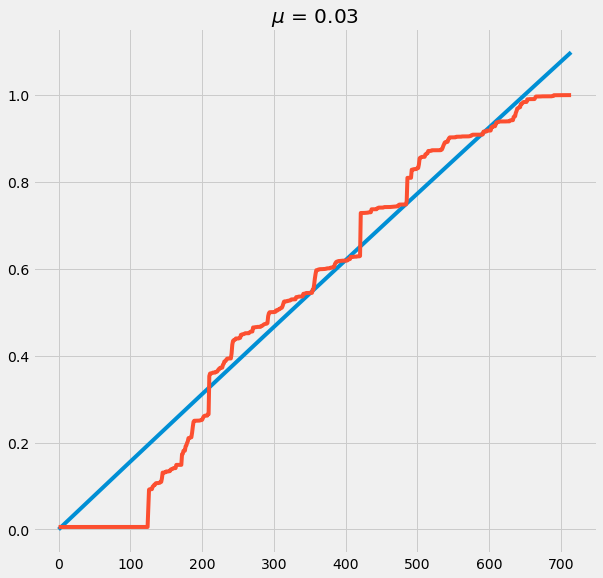

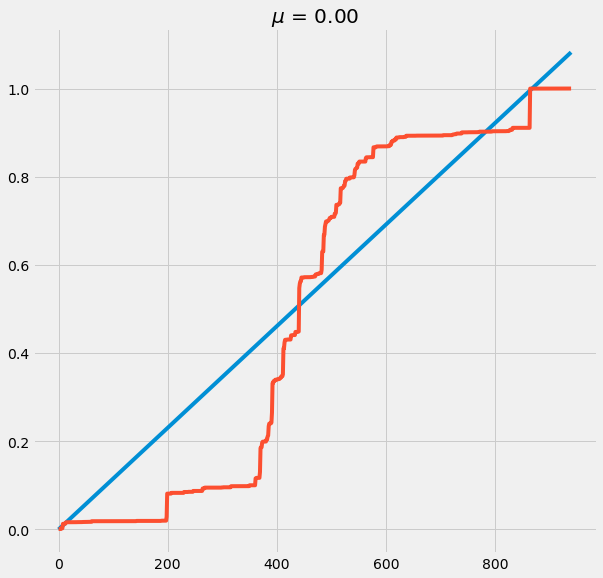

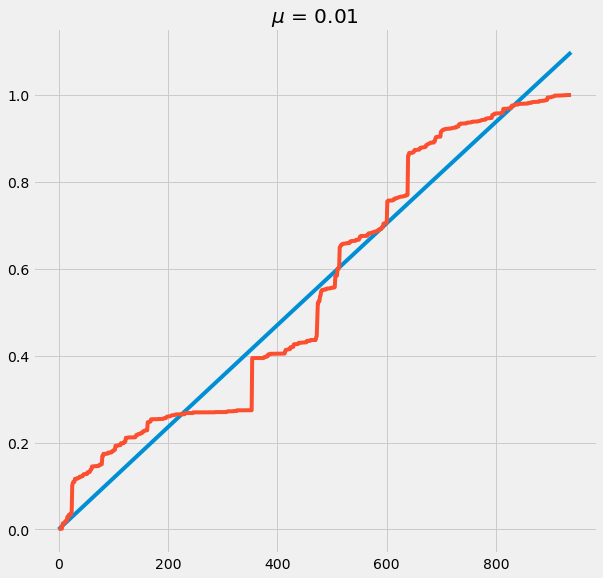

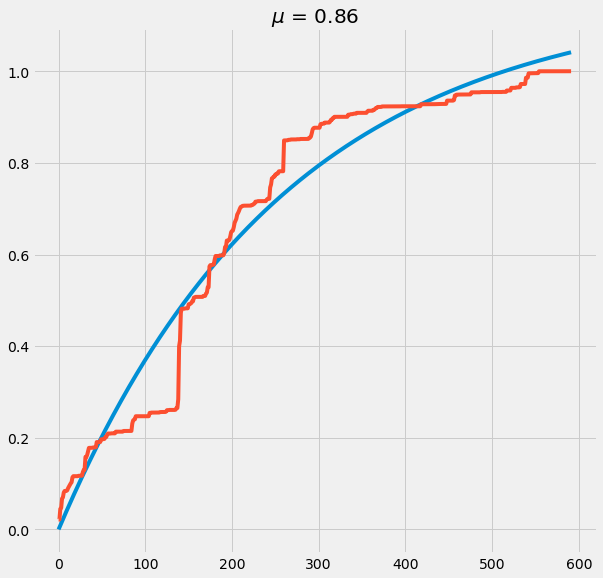

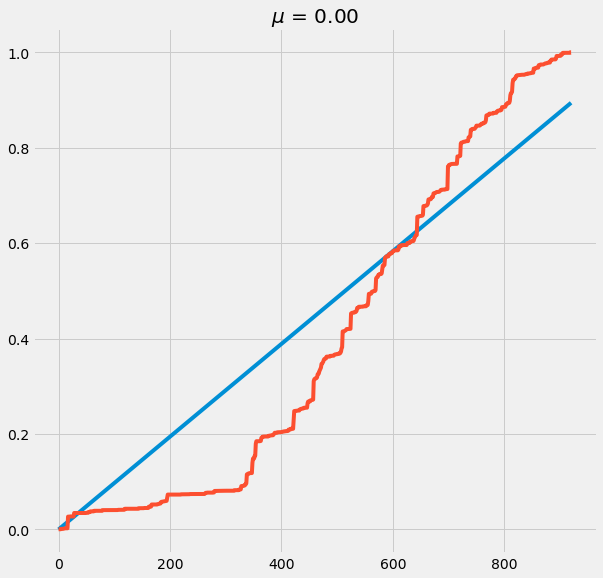

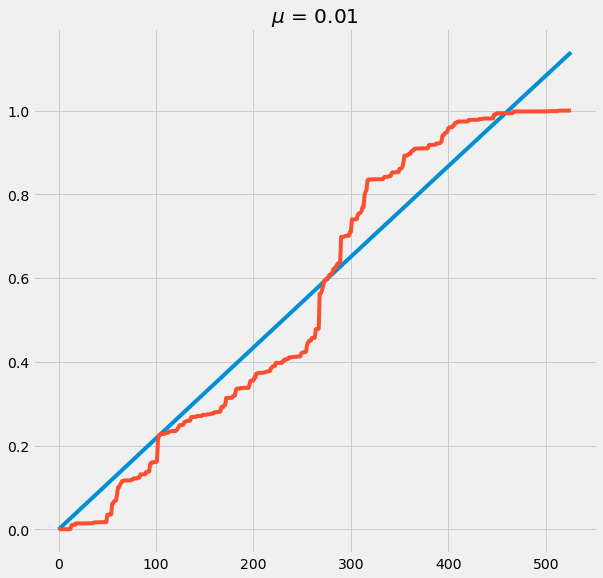

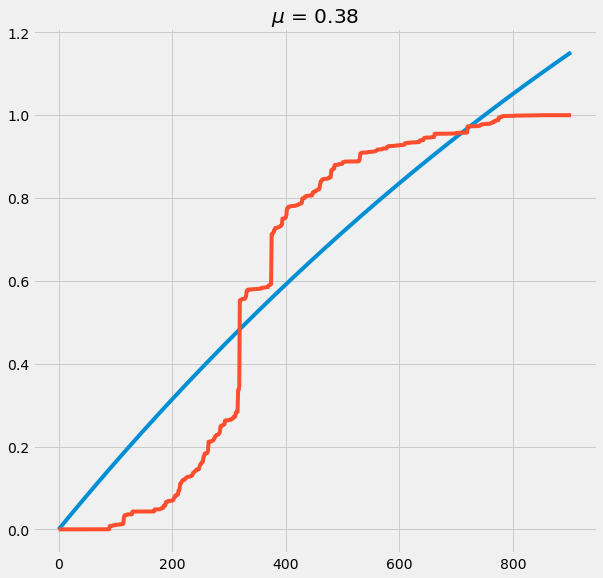

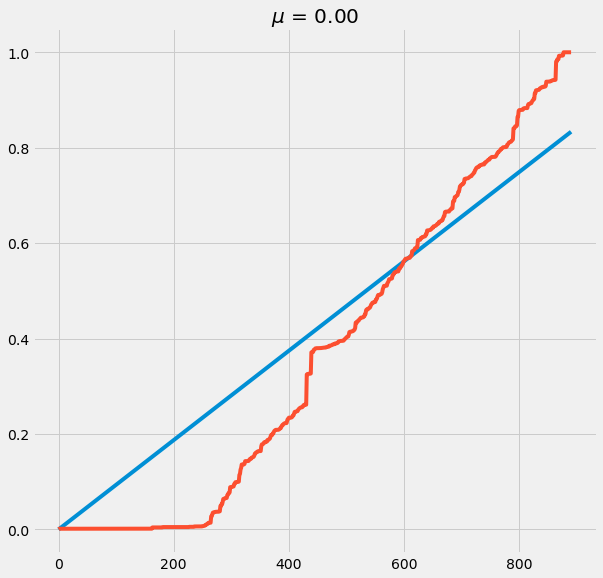

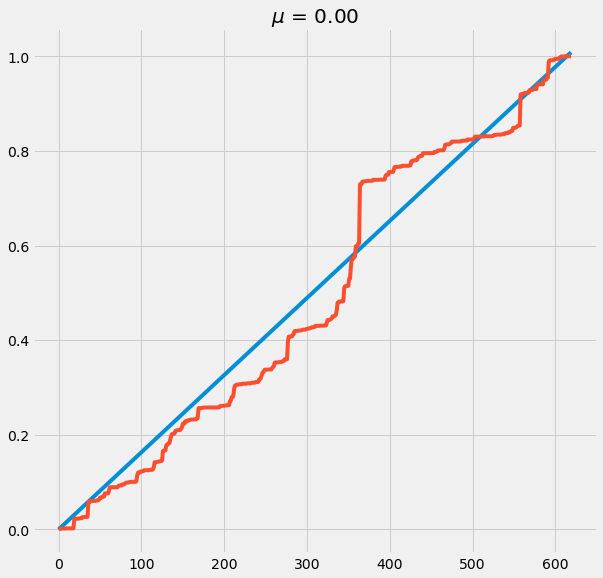

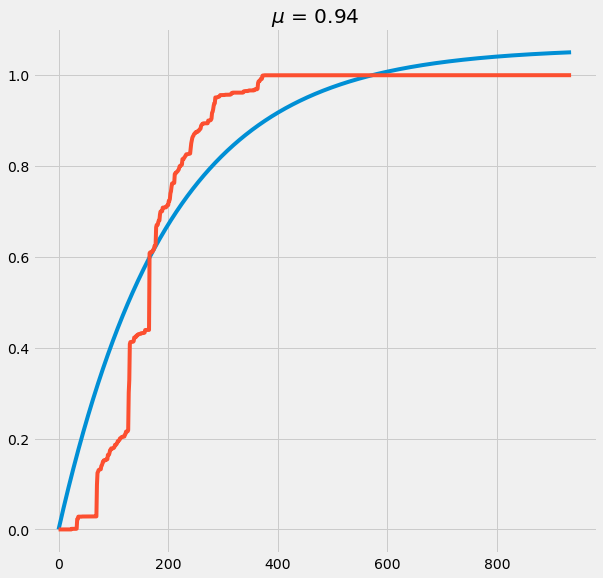

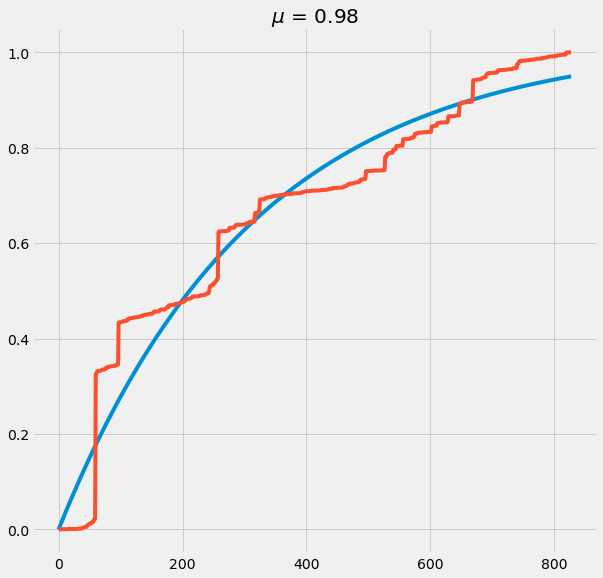

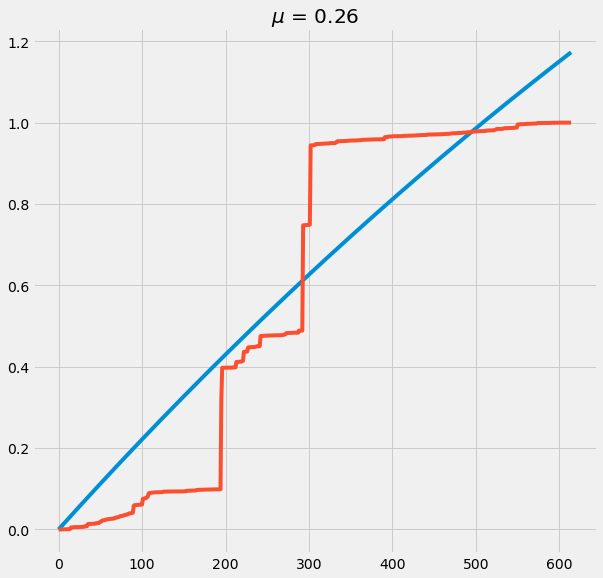

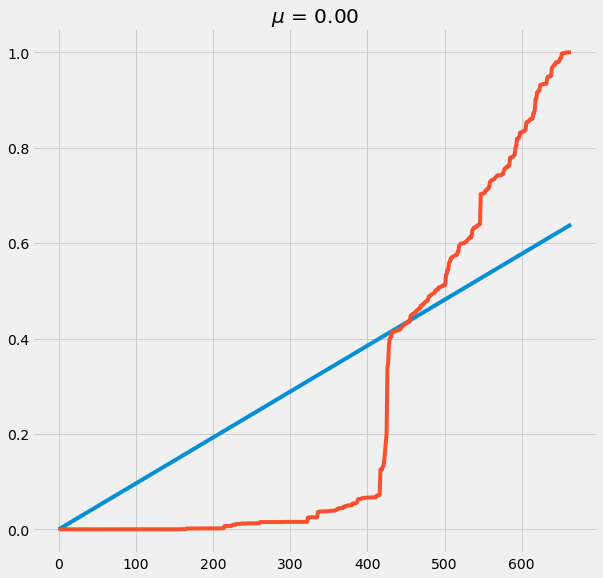

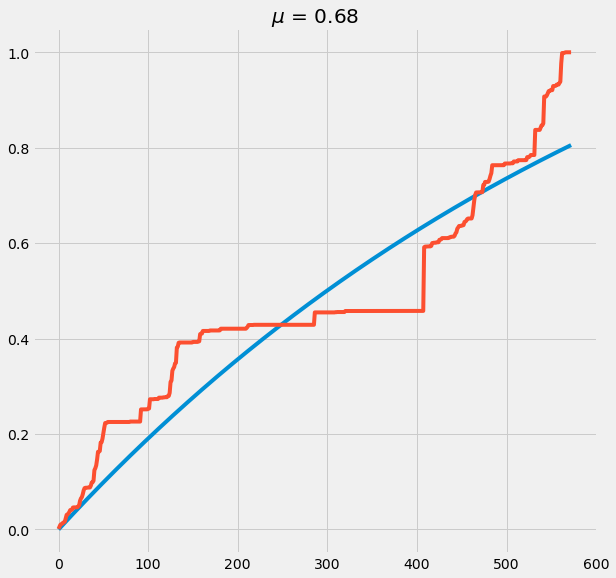

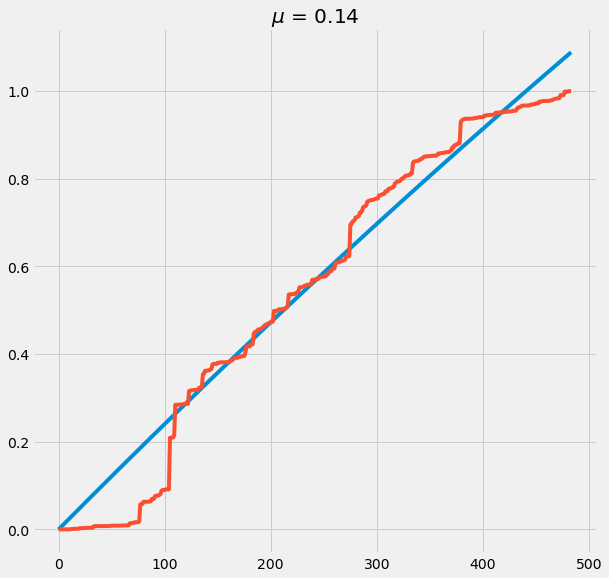

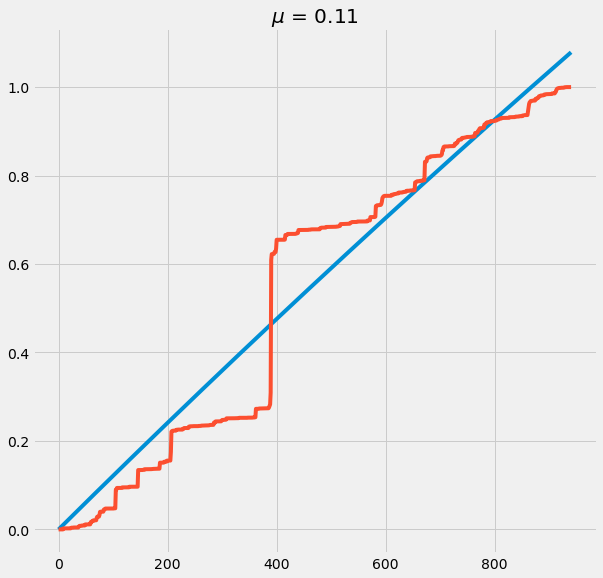

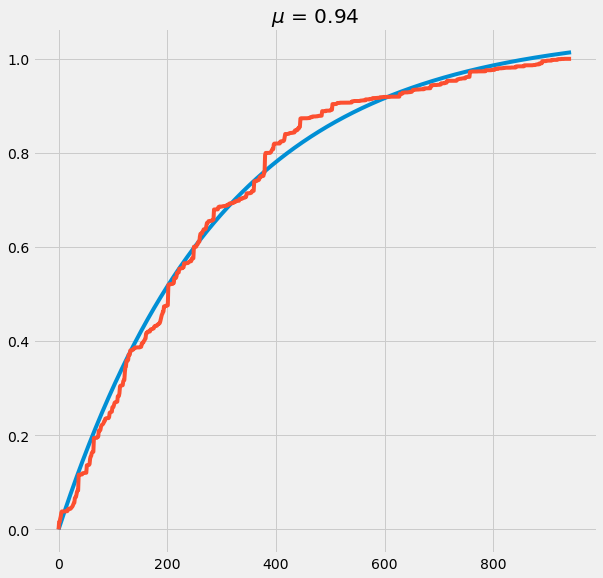

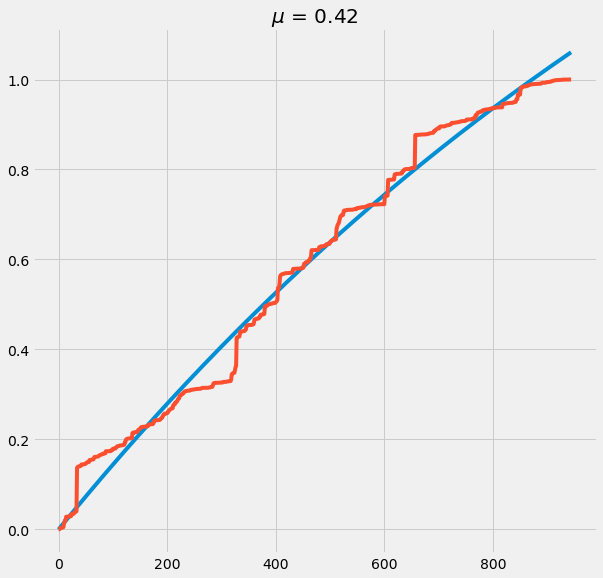

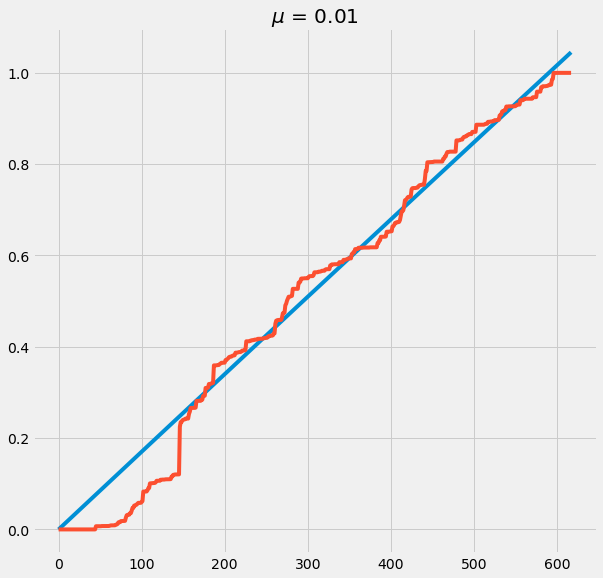

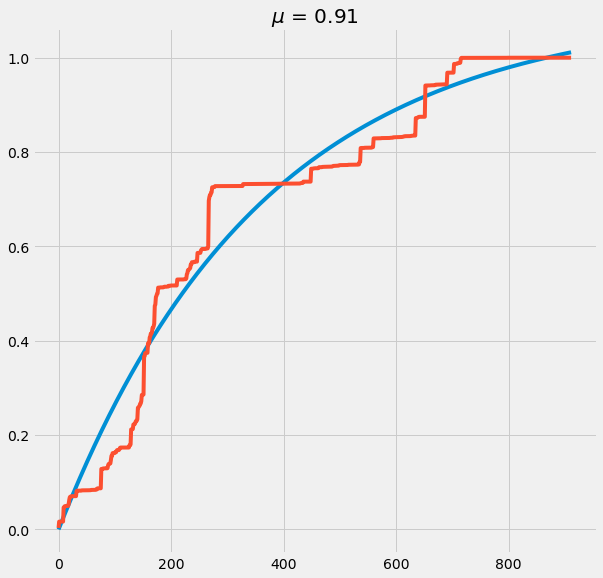

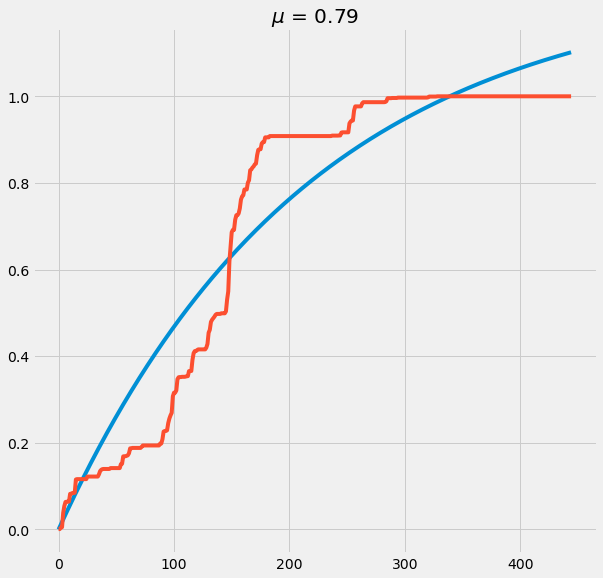

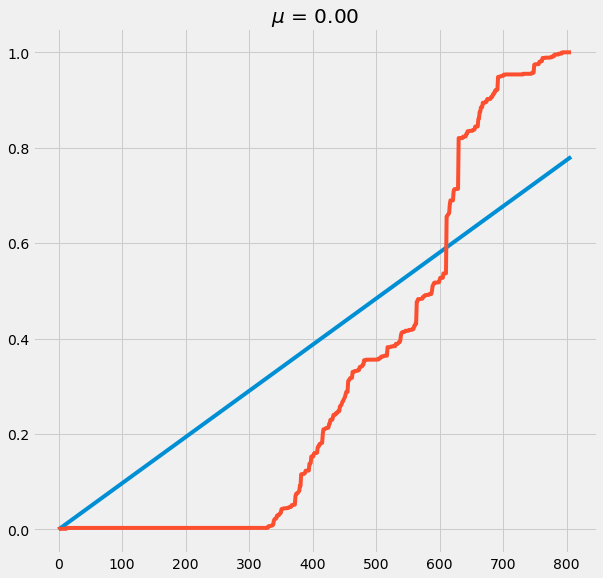

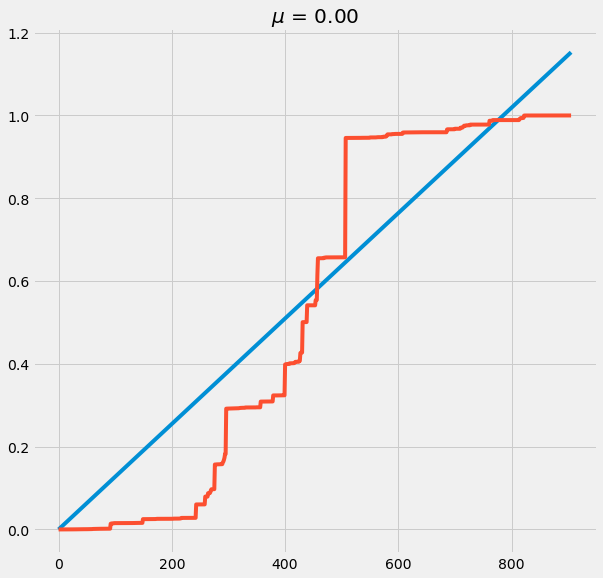

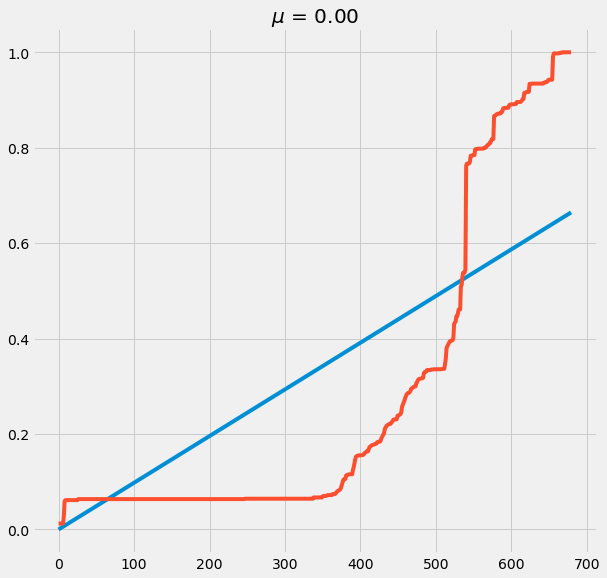

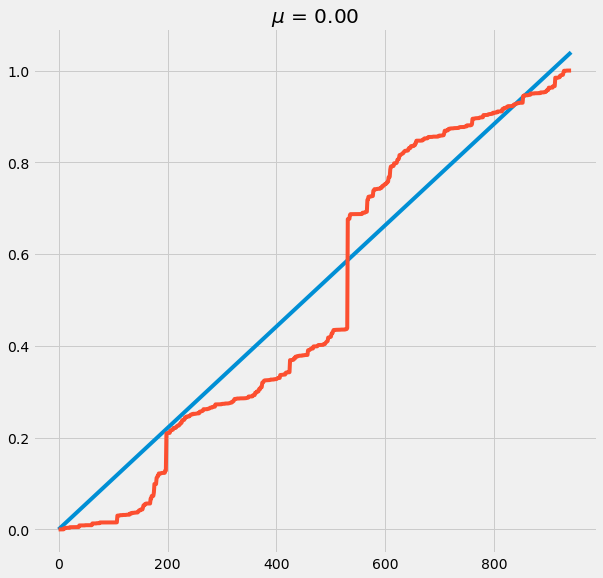

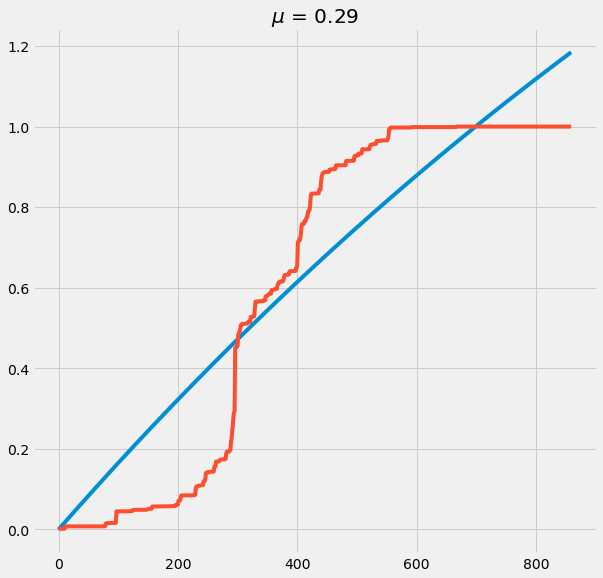

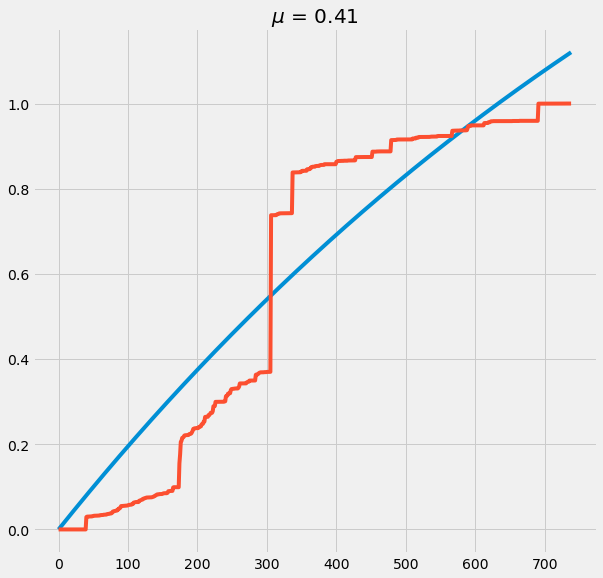

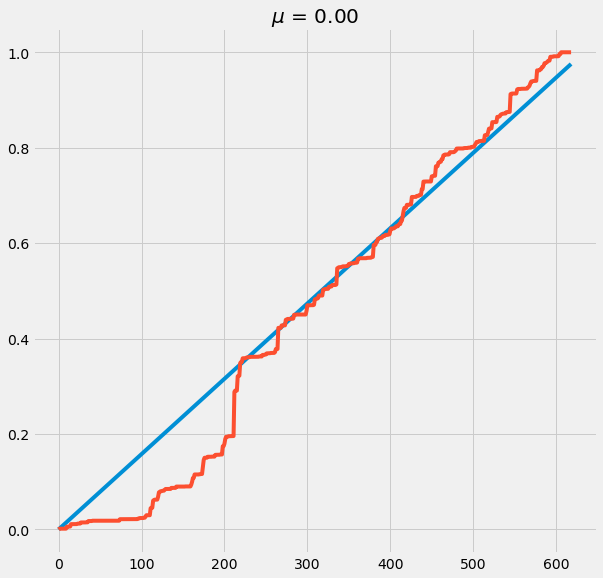

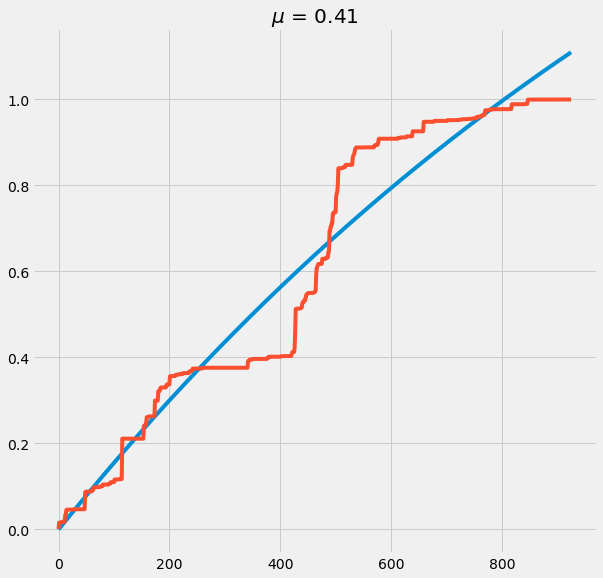

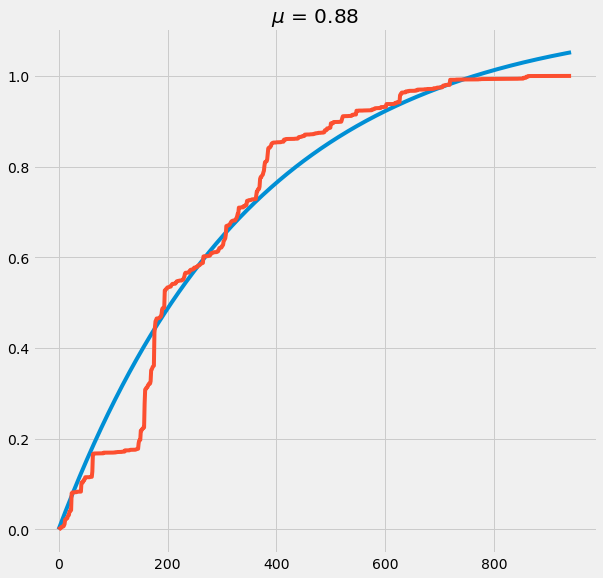

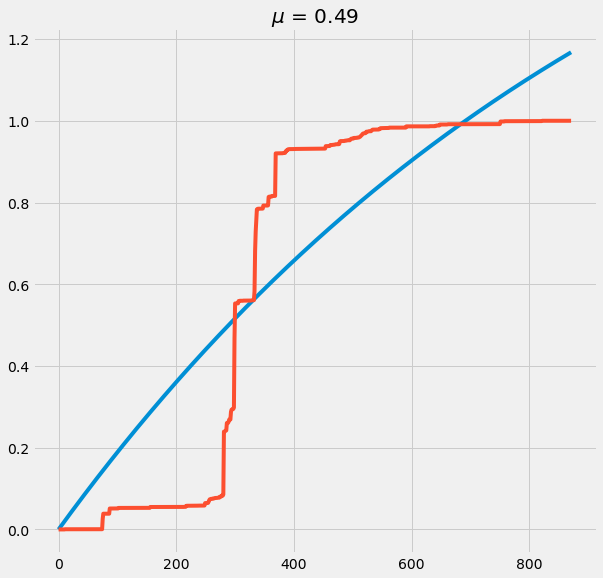

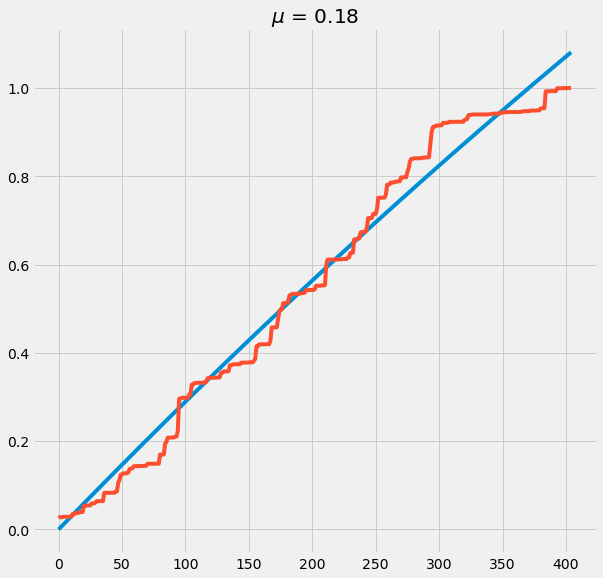

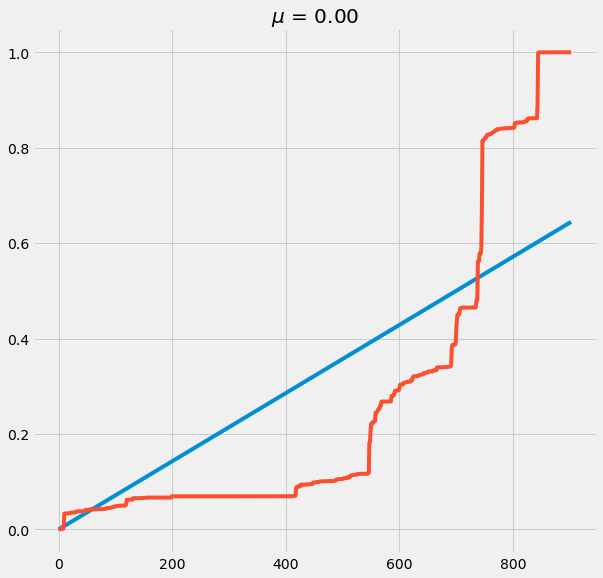

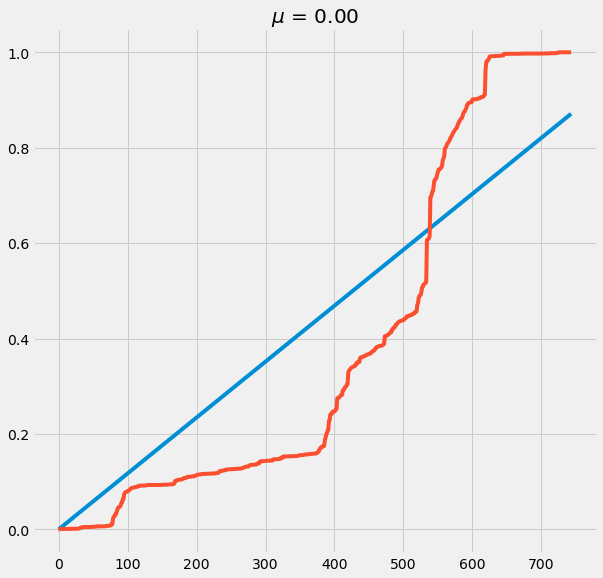

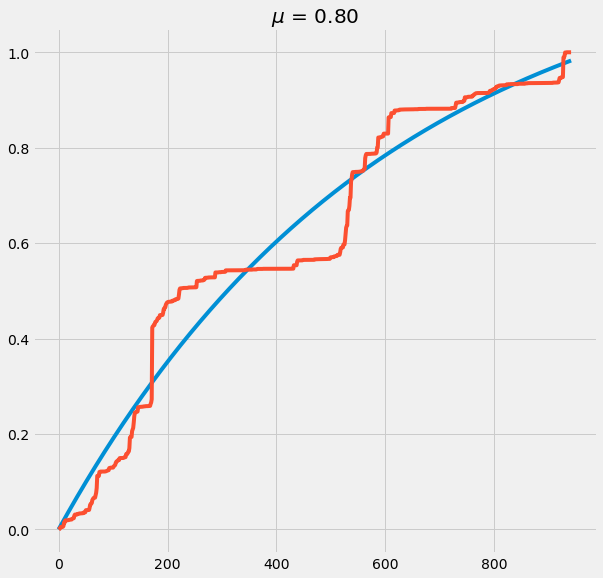

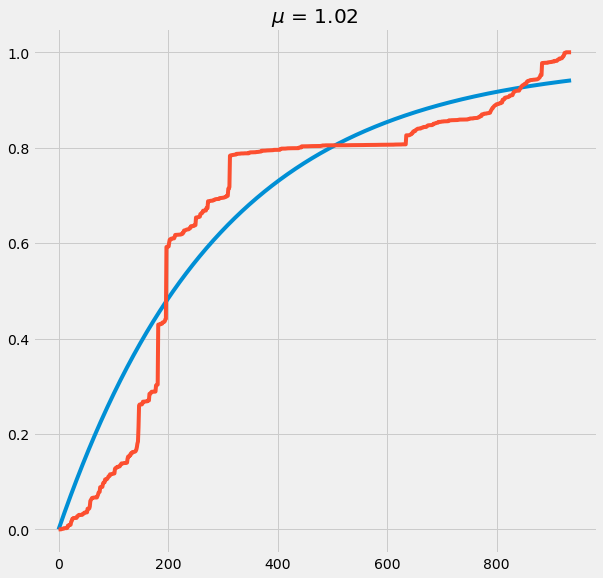

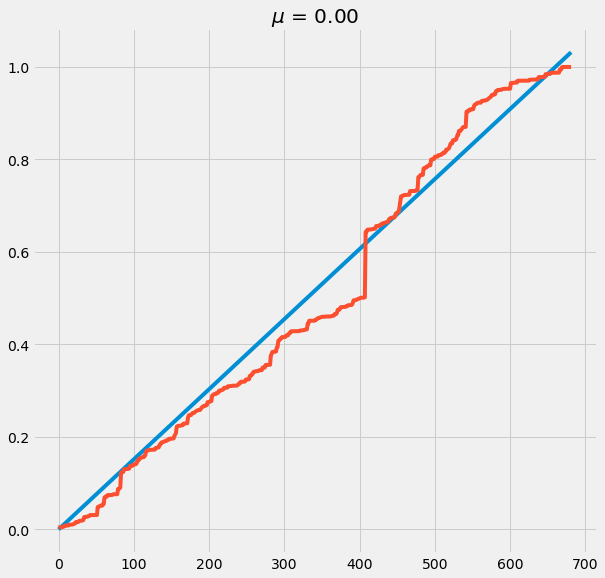

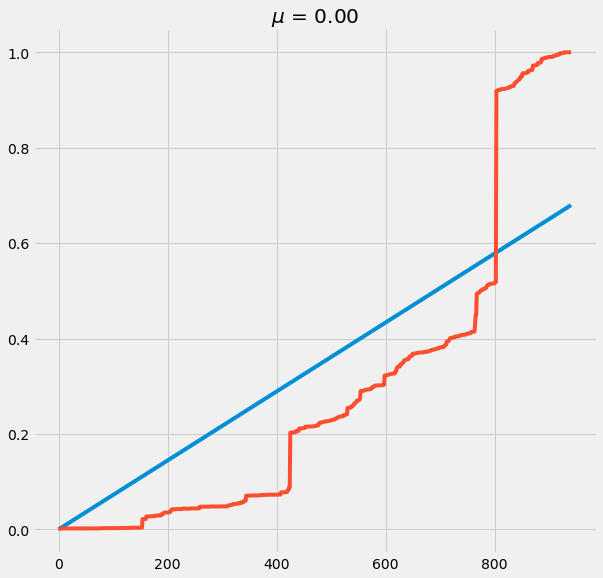

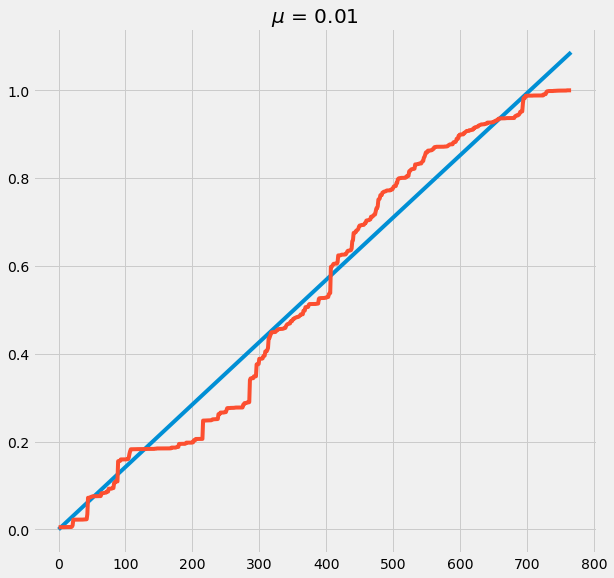

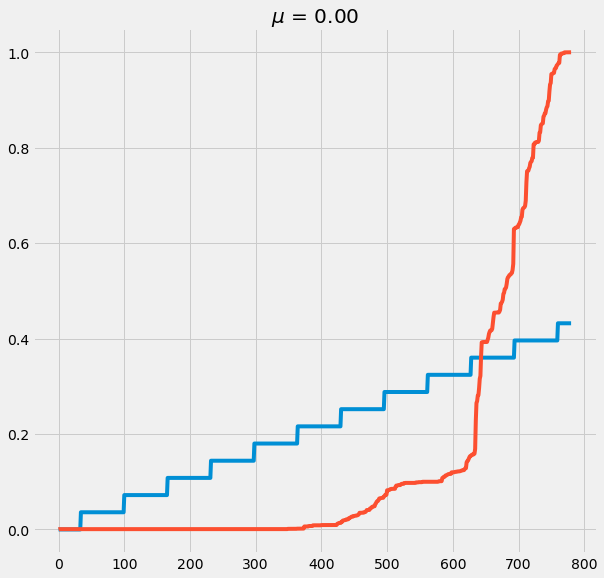

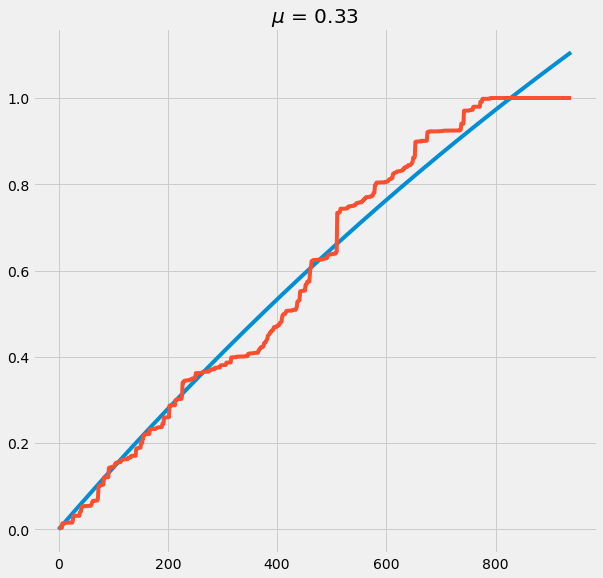

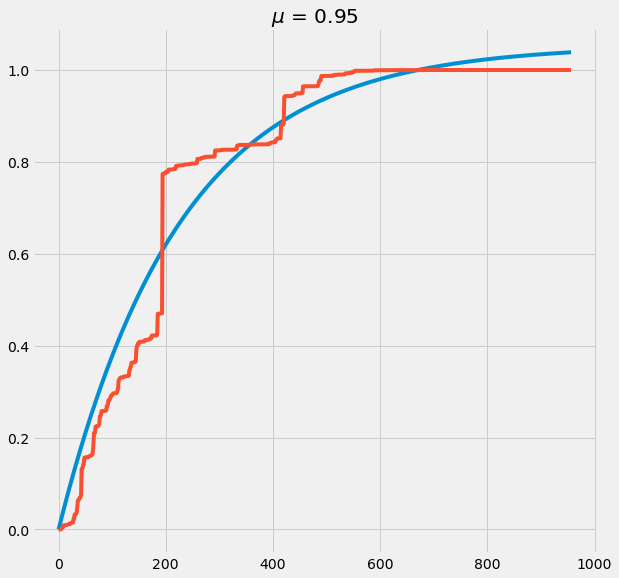

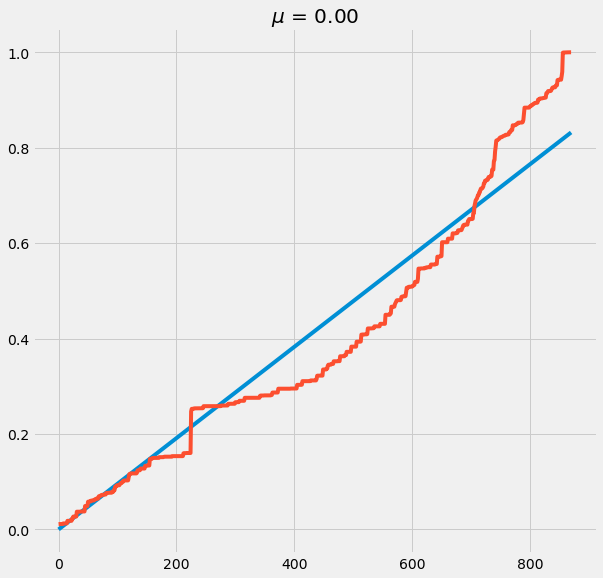

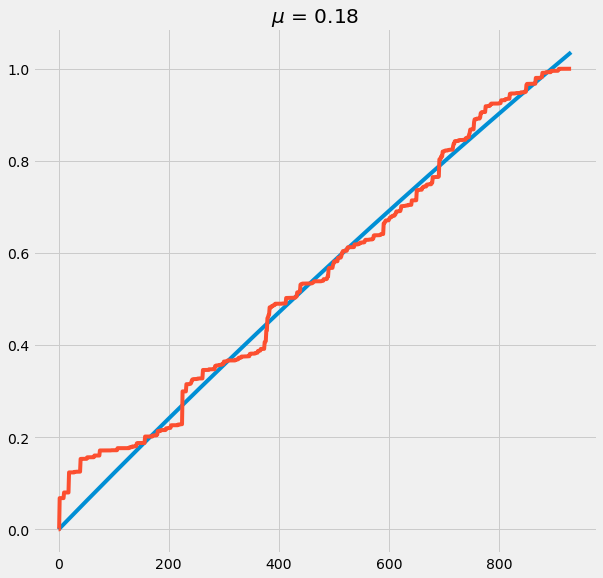

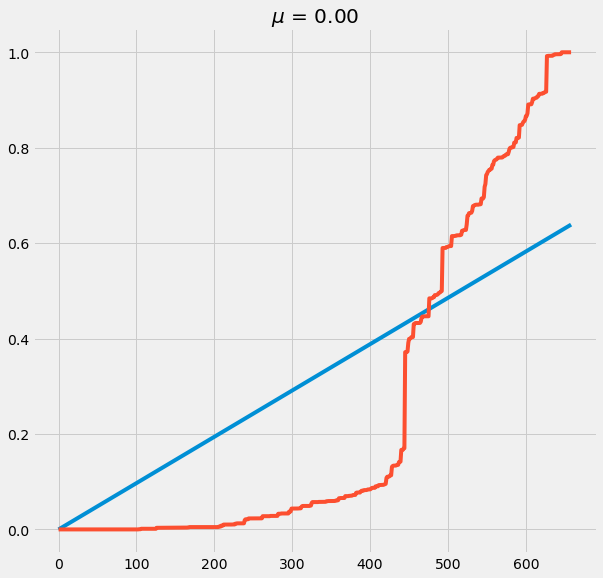

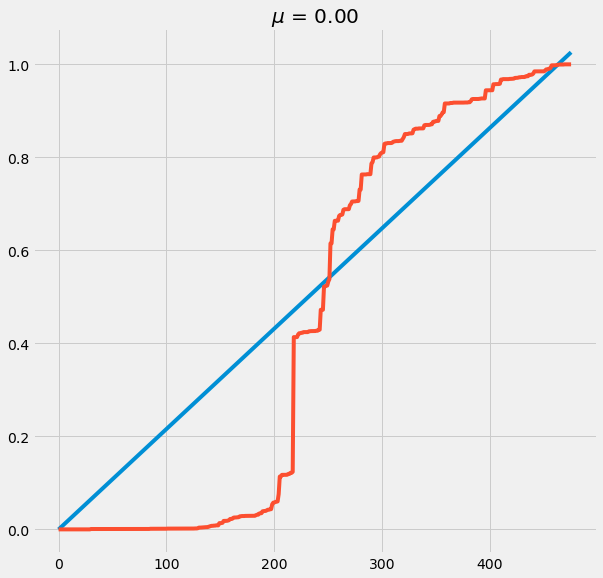

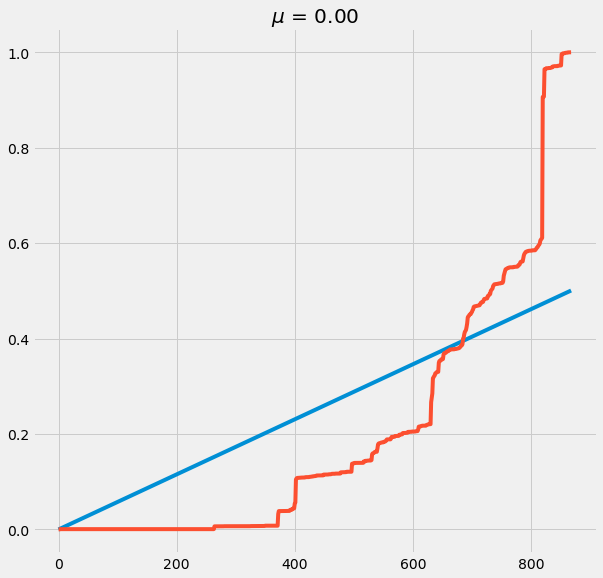

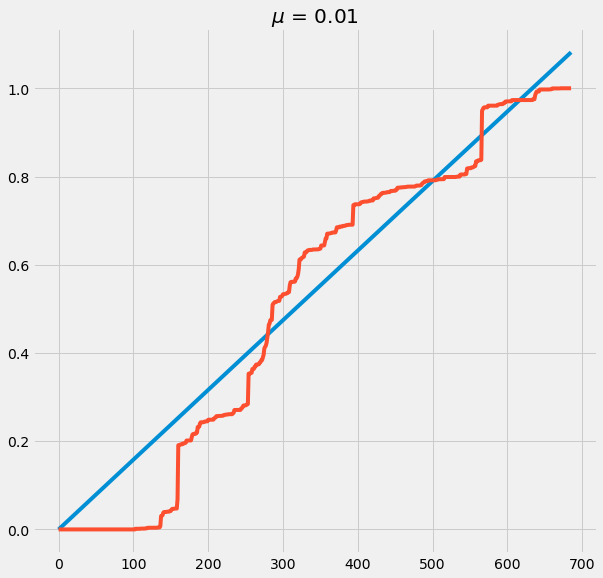

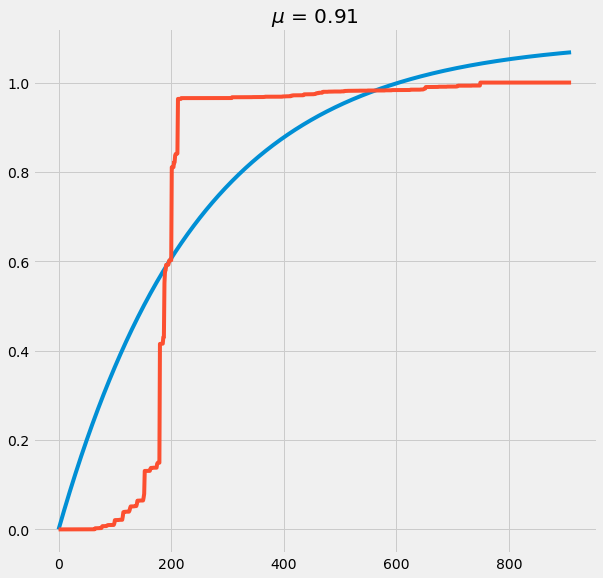

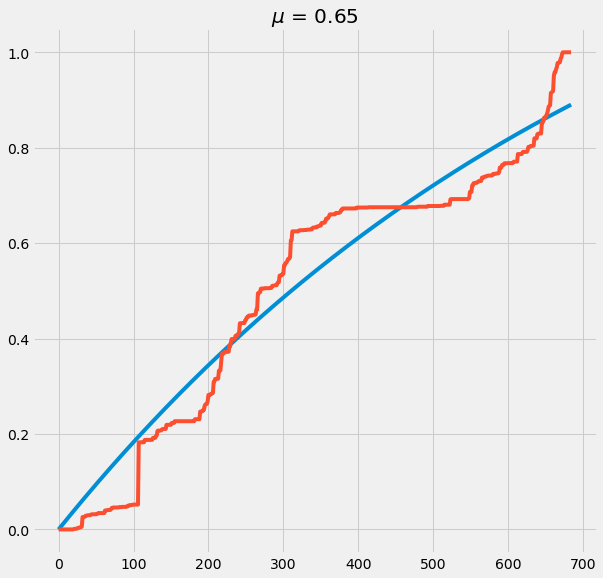

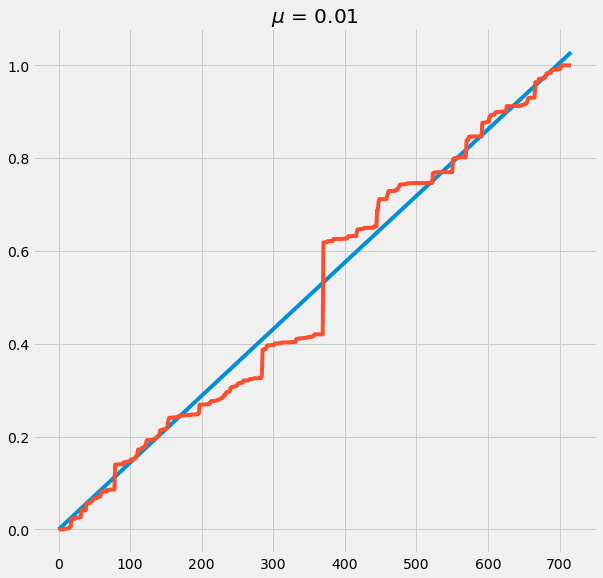

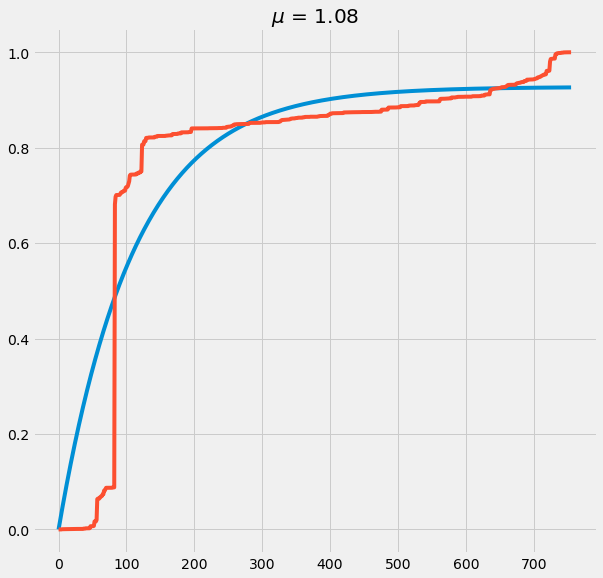

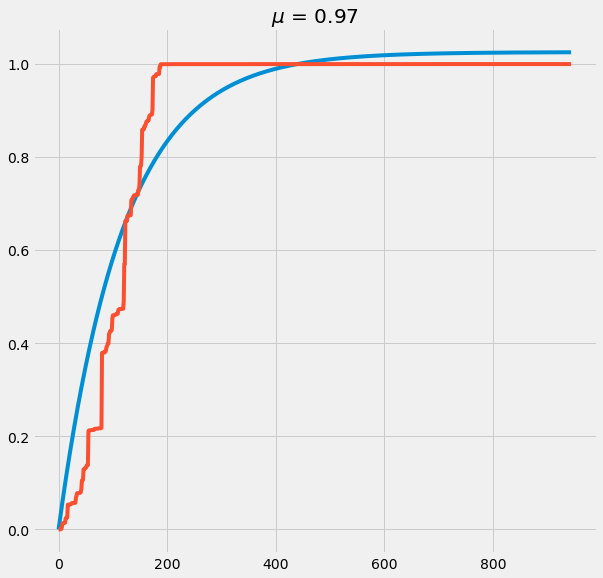

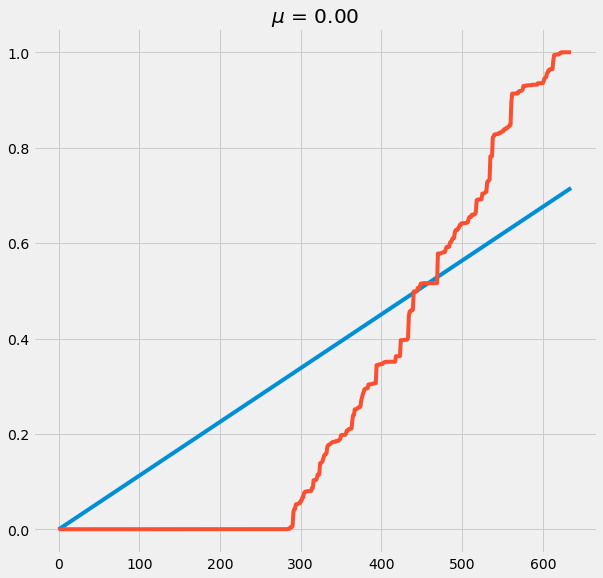

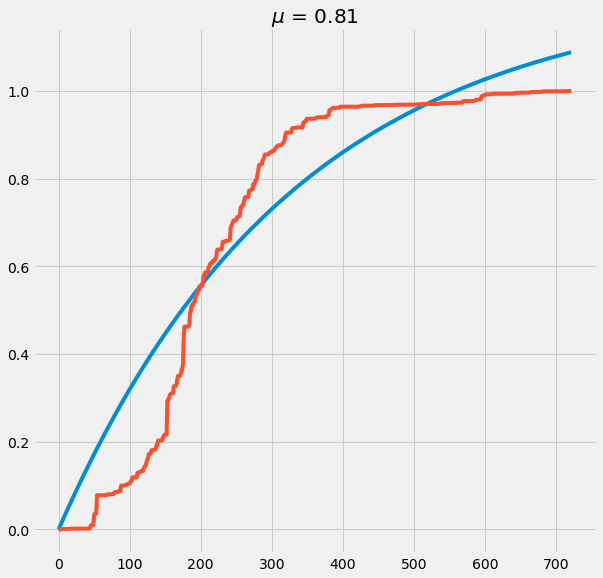

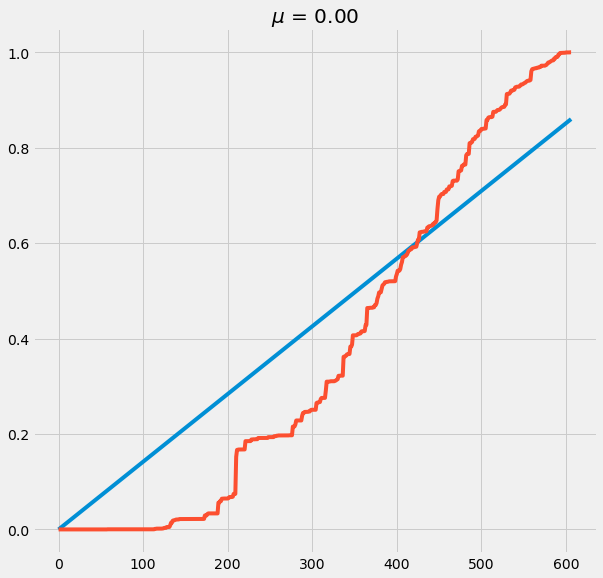

C:\Users\ya-dm\miniconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
C:\Users\ya-dm\miniconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


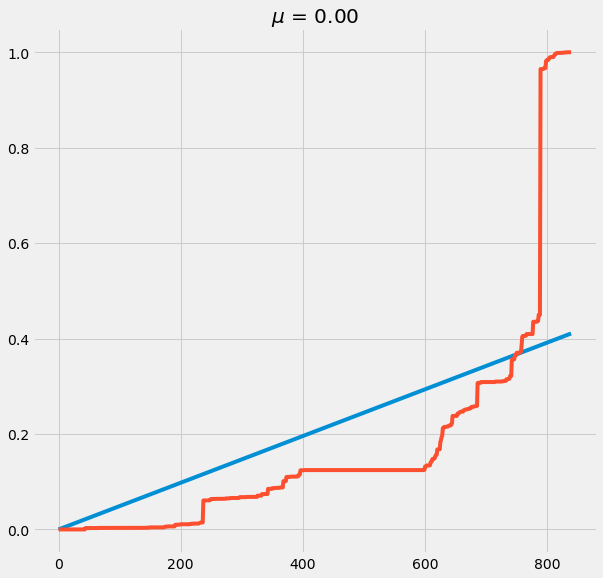

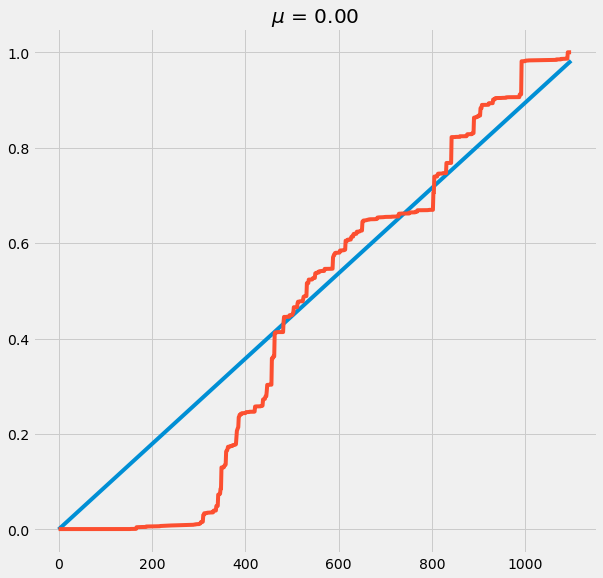

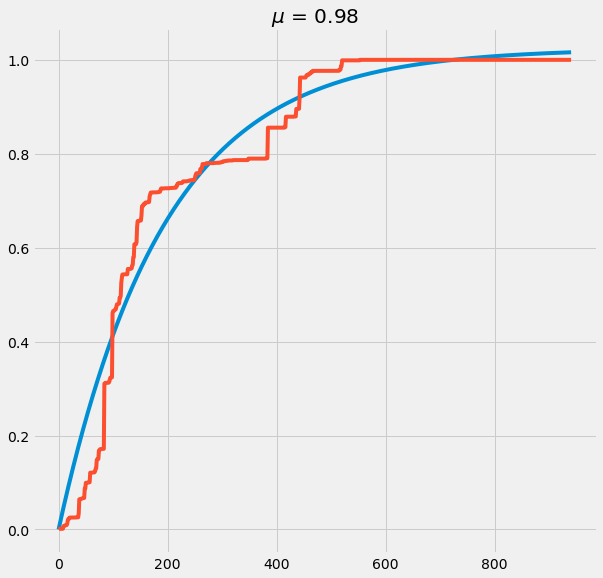

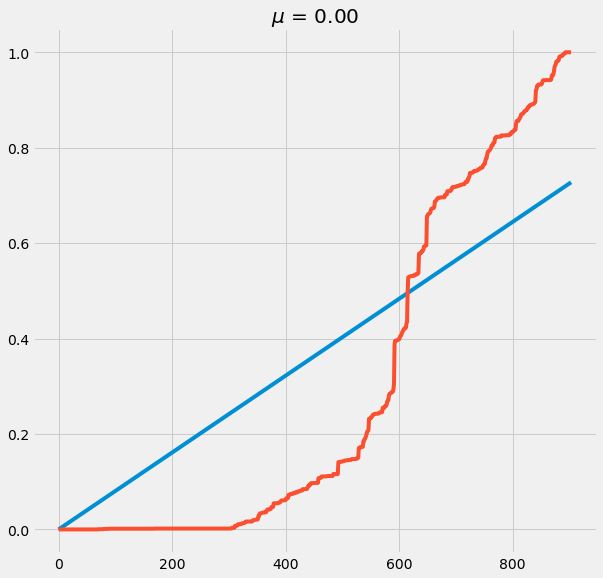

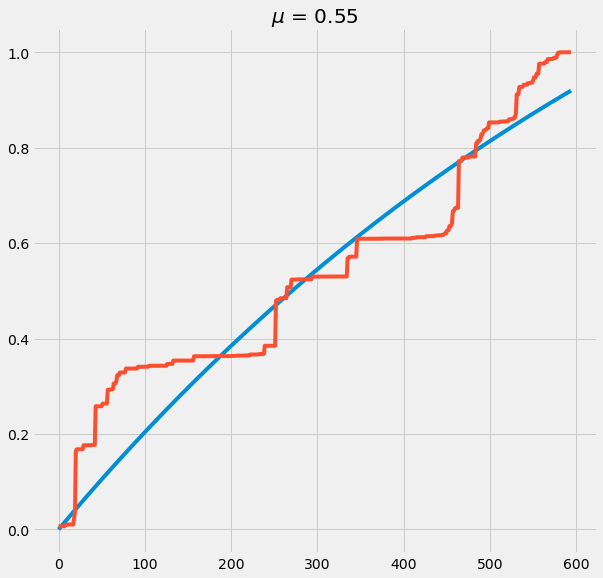

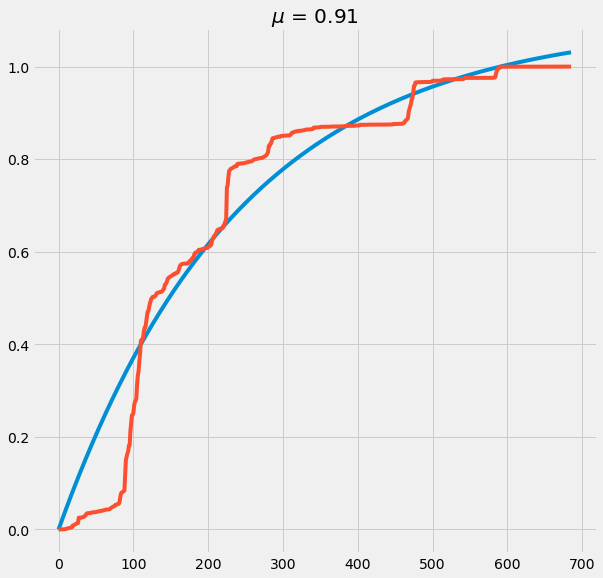

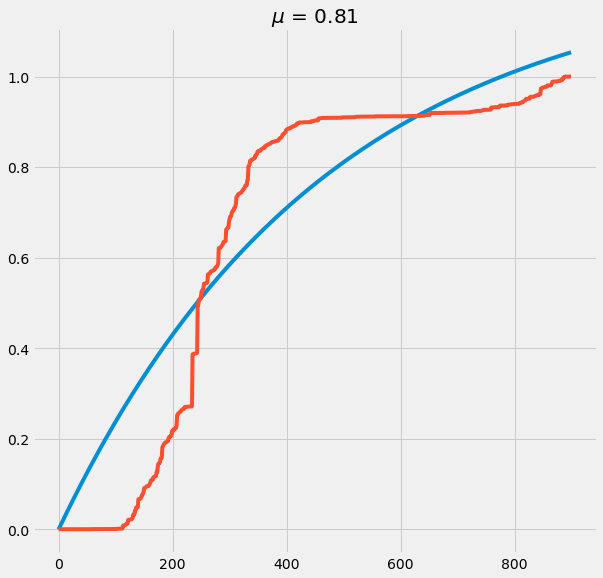

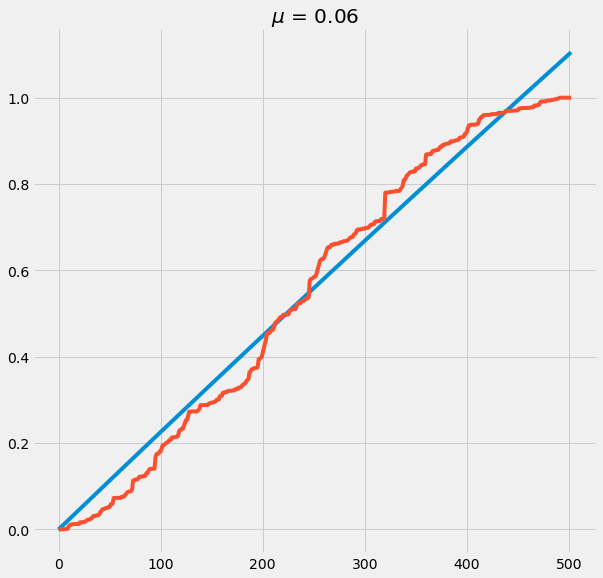

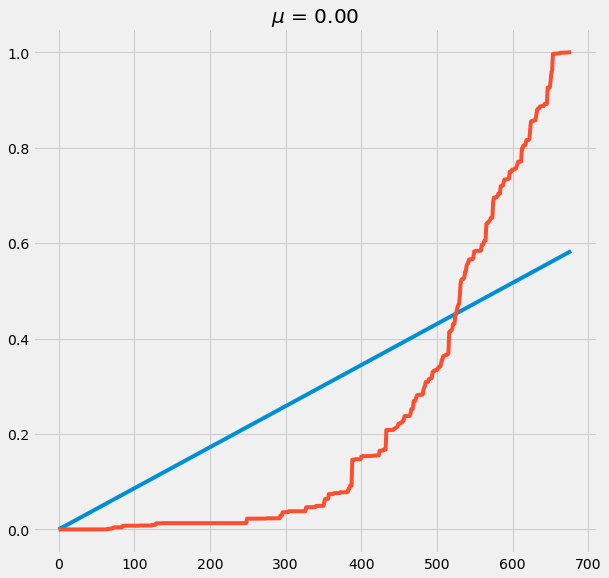

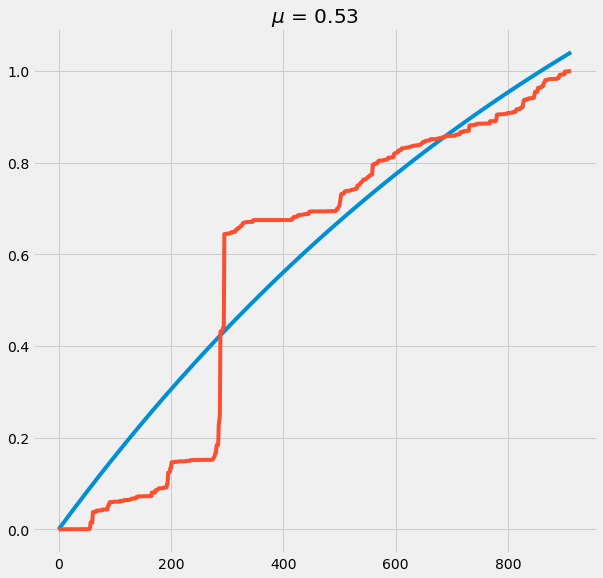

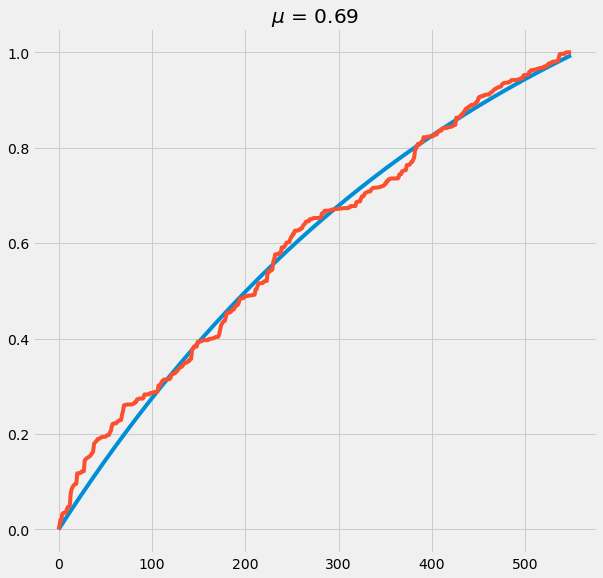

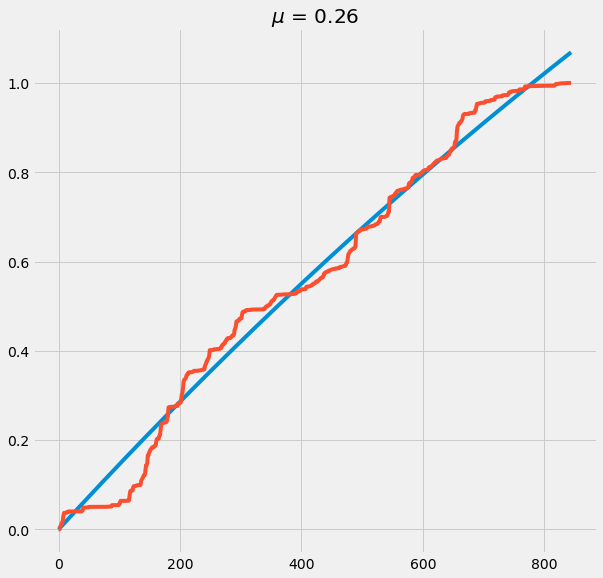

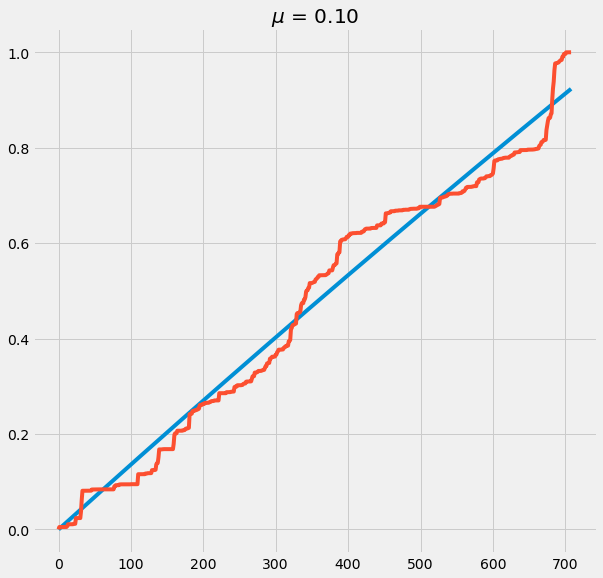

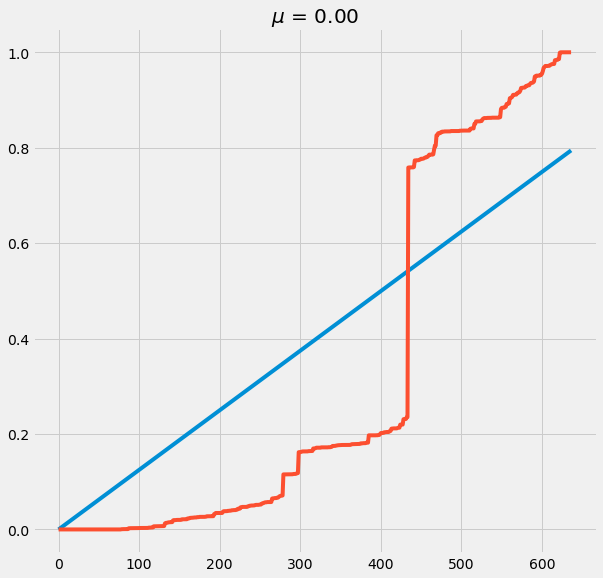

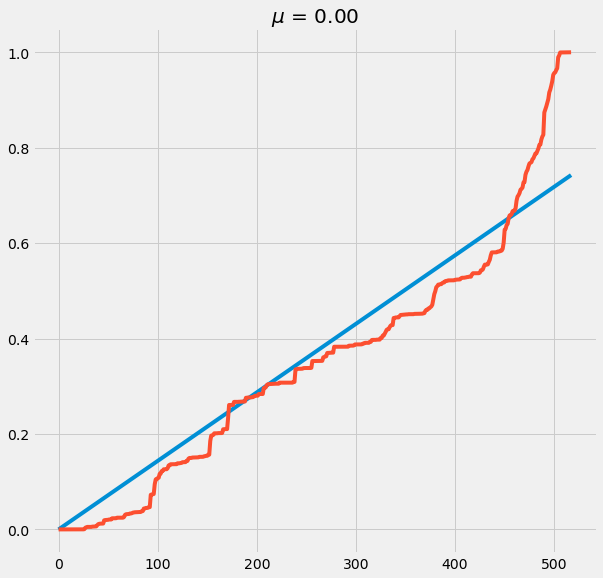

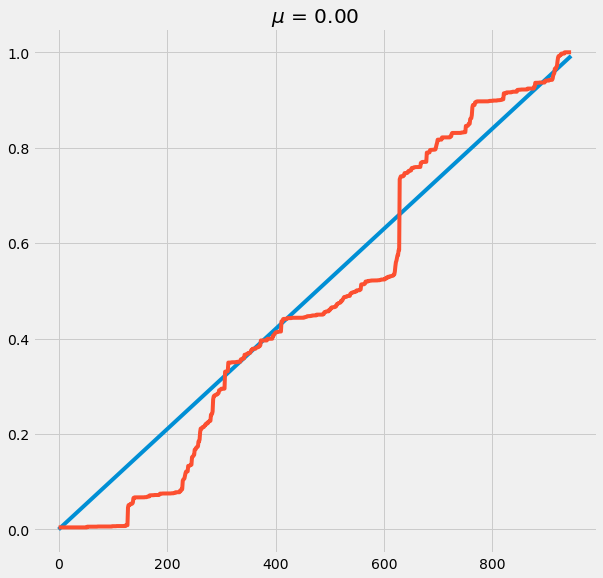

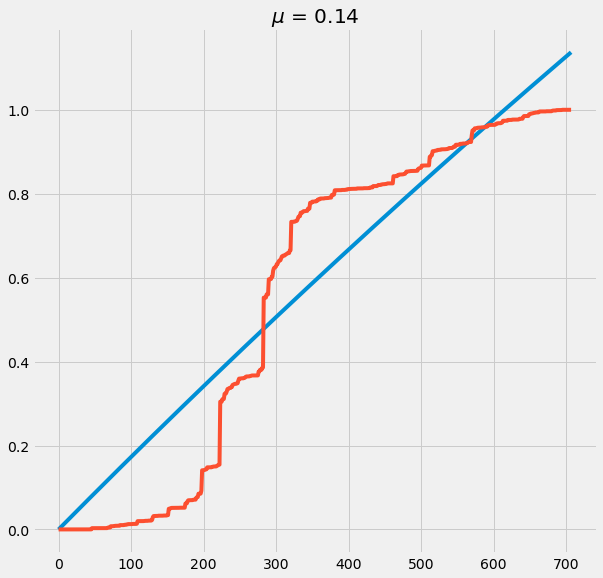

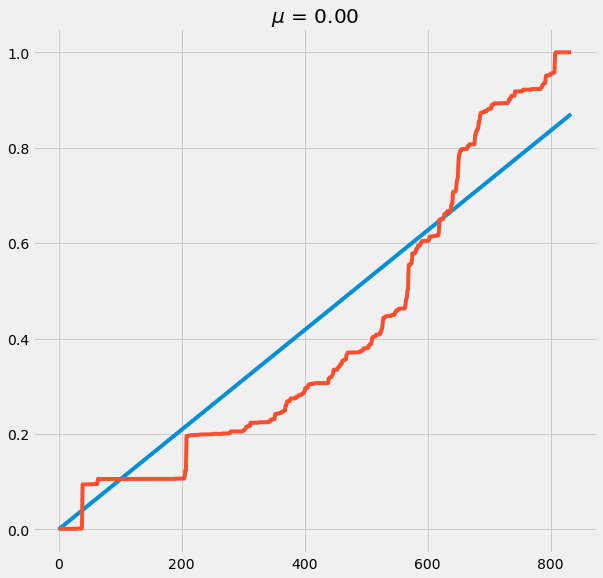

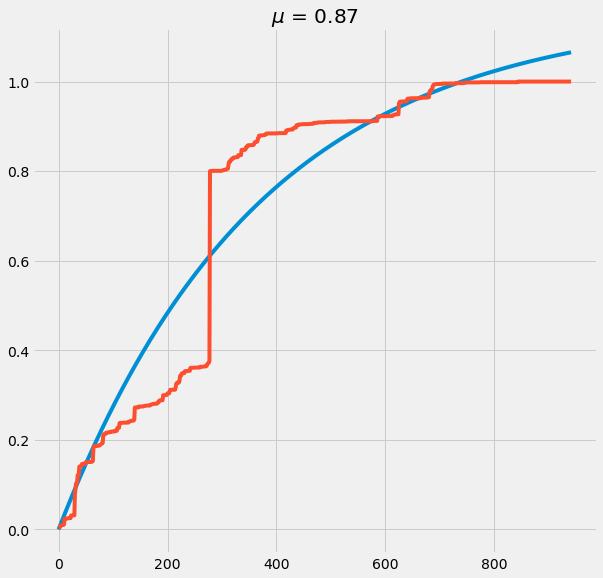

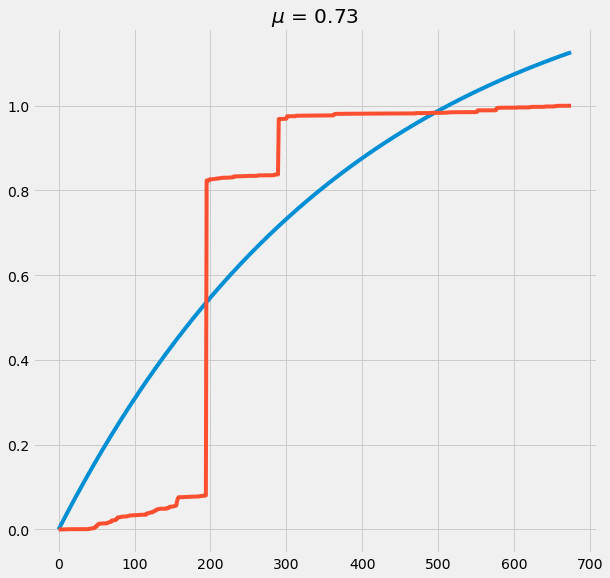

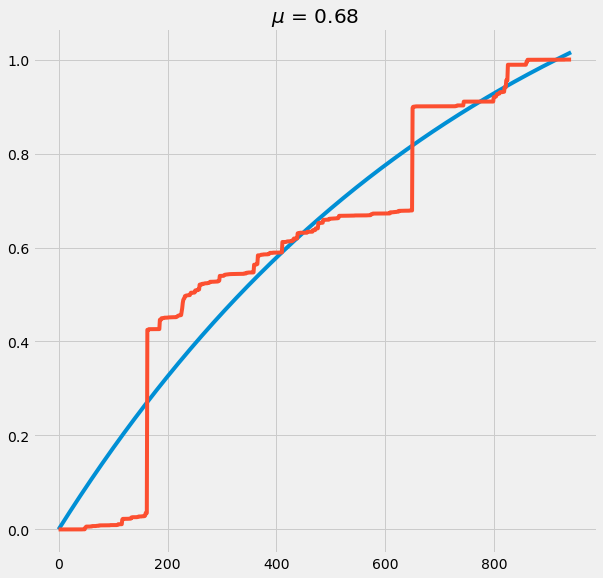

In [41]:
if __name__ == "__main__":
    plt.rcParams["figure.figsize"] = (9, 9)
    plt.style.use('fivethirtyeight')
    np.seterr(invalid='ignore')
    main(lnx)